## Panel plots for shear/veer, diurnal/seasonal cycle

### Imports, data read in

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon
pd.options.mode.chained_assignment = None
from matplotlib.ticker import PercentFormatter

In [2]:
data_path = '../detection2/'
# nwf
vwcent_nwf = pd.read_csv(data_path + 'NWF_vwcent.csv')
nebuoy_nwf = pd.read_csv(data_path + 'NWF_nebuoy.csv')
nebuoy_nwf = pd.concat([nebuoy_nwf.set_index('Time').loc['2019-09-01':'2019-11-01'], 
                        nebuoy_nwf.set_index('Time').loc['2020-07-01':]]).reset_index()
southcent_nwf = pd.read_csv(data_path + 'NWF_southcent.csv')
swbuoy_nwf = pd.read_csv(data_path + 'NWF_swbuoy.csv')
swcorner_nwf = pd.read_csv(data_path + 'NWF_vwcorner.csv')

# wf
vwcent_wf = pd.read_csv(data_path + 'VW100_vwcent.csv')
nebuoy_wf = pd.read_csv(data_path + 'CA100_nebuoy.csv')
nebuoy_wf = pd.concat([nebuoy_wf.set_index('Time').loc['2019-09-01':'2019-11-01'], 
                        nebuoy_wf.set_index('Time').loc['2020-07-01':]]).reset_index()
southcent_wf = pd.read_csv(data_path + 'LA100_southcent.csv')
swbuoy_wf = pd.read_csv(data_path + 'CA100_swbuoy.csv')
swcorner_wf = pd.read_csv(data_path + 'VW100_vwcorner.csv')

# create lists of locations
nwf_locs = [vwcent_nwf, southcent_nwf, swcorner_nwf, nebuoy_nwf, swbuoy_nwf]
wf_locs = [vwcent_wf, southcent_wf, swcorner_wf, nebuoy_wf, swbuoy_wf]
loc_names = ['VWcent', 'southLA', 'SWcorner', 'NEbuoy', 'SWbuoy']
wf_names = ['VW100', 'LA100', 'VW100', 'CA100', 'CA100']

### Wind speed histograms

In [5]:
ws_vwcent_nwf = pd.read_csv('../make_wr/vwcent_wind.csv')
ws_southla_nwf = pd.read_csv('../make_wr/southla_wind.csv')
ws2 = [ws_vwcent_nwf, ws_southla_nwf]

ws_vwc_nwf = pd.read_csv('../make_wr/swcorner_wind.csv')
ws_nebuoy_nwf = pd.read_csv('../make_wr/nebuoy_wind.csv')
ws_swbuoy_nwf = pd.read_csv('../make_wr/swbuoy_wind.csv')
ws3 = [ws_vwc_nwf, ws_nebuoy_nwf, ws_swbuoy_nwf]

In [4]:
def plot_pct_hist(data, ax, label, bins=np.arange(10, 40, 2), line=True, color='k', linestyle='solid', alpha=1, hatch='//'):
    '''
    for plotting wind speed histograms 
    '''
    
    weight = np.ones(len(data.dropna())) / len(data.dropna())
    
    # option to also plot a line that intersects at the midpoint of each bar
    if line:
        n,x = np.histogram(data.dropna(), bins=bins, weights=weight)
        bin_centers = 0.5*(x[1:]+x[:-1])
        ax.plot(bin_centers, n, label=label, color=color, linestyle=linestyle)
    else:
        ax.hist(data.dropna(), 
                bins=bins, 
                weights=weight, 
                width=1.9, 
                label=label, 
                edgecolor='k',
                color=color,
                alpha=alpha,
                hatch=hatch)

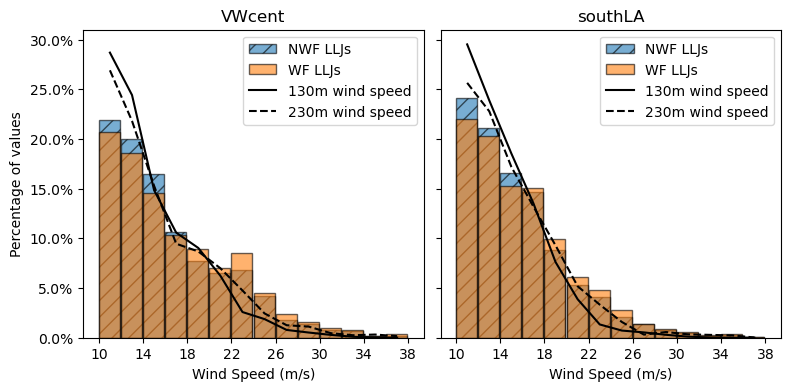

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax0 = axs[0]
ax1 = axs[1]

ax0.set_title('VWcent')
ax1.set_title('southLA')

# plot the LLJ wind speeds - hist
plot_pct_hist(nwf_locs[0]['Nose windspeed (m/s)'], ax0, label='NWF LLJs', line=False, color='tab:blue', alpha=0.6)
plot_pct_hist(wf_locs[0]['Nose windspeed (m/s)'], ax0, label='WF LLJs', line=False, color='tab:orange', alpha=0.6, hatch=None)
plot_pct_hist(nwf_locs[1]['Nose windspeed (m/s)'], ax1, label='NWF LLJs', line=False, color='tab:blue', alpha=0.6)
plot_pct_hist(wf_locs[1]['Nose windspeed (m/s)'], ax1, label='WF LLJs', line=False, color='tab:orange', alpha=0.6, hatch=None)

# plot the background wind speeds at hub height - line
plot_pct_hist(ws2[0]['130m ws'][ws2[0]['130m ws']>=10], ax0, label='130m wind speed')
plot_pct_hist(ws2[1]['130m ws'][ws2[1]['130m ws']>=10], ax1, label='130m wind speed')

# plot the background wind speeds at hub height + 100m - line
plot_pct_hist(ws2[0]['230m ws'][ws2[0]['230m ws']>=10], ax0, label='230m wind speed', linestyle='dashed')
plot_pct_hist(ws2[1]['230m ws'][ws2[1]['230m ws']>=10], ax1, label='230m wind speed', linestyle='dashed')

for ax in axs:
    ax.set_xticks(np.arange(10, 40, 4))
    ax.set_xlabel('Wind Speed (m/s)')
    ax.yaxis.set_major_formatter(PercentFormatter(1))
#     ax.axvline(10, linestyle='dotted', color='grey')
    
ax0.legend()
ax1.legend()
ax0.set_ylabel('Percentage of values')

plt.subplots_adjust(wspace=0.05)

fig.savefig('../output_plots/paper_plots/ws2.png');

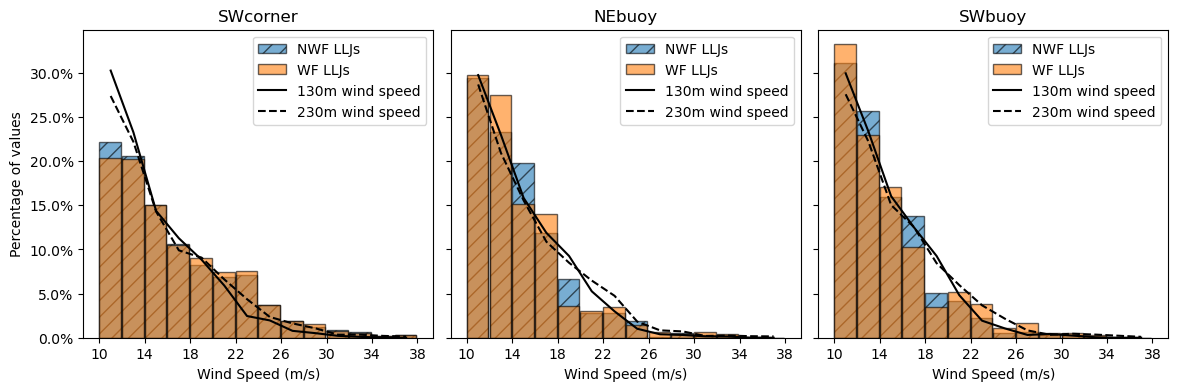

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), sharey=True)

ax0 = axs[0]
ax1 = axs[1]
ax2 = axs[2]

ax0.set_title('SWcorner')
ax1.set_title('NEbuoy')
ax2.set_title('SWbuoy')

# plot the LLJ wind speeds - hist
for i in range(3):
    plot_pct_hist(nwf_locs[i+2]['Nose windspeed (m/s)'], axs[i], label='NWF LLJs', line=False, color='tab:blue', alpha=0.6)
    plot_pct_hist(wf_locs[i+2]['Nose windspeed (m/s)'], axs[i], label='WF LLJs', line=False, color='tab:orange', alpha=0.6, hatch=None)
    plot_pct_hist(ws3[i]['130m ws'][ws3[i]['130m ws']>=10], axs[i], label='130m wind speed')
    plot_pct_hist(ws3[i]['230m ws'][ws3[i]['230m ws']>=10], axs[i], label='230m wind speed', linestyle='dashed')

for ax in axs:
    ax.set_xticks(np.arange(10, 40, 4))
    ax.set_xlabel('Wind Speed (m/s)')
    ax.yaxis.set_major_formatter(PercentFormatter(1))
#     ax.axvline(10, linestyle='dotted', color='grey')
    
ax0.legend()
ax1.legend()
ax2.legend()
ax0.set_ylabel('Percentage of values')

plt.subplots_adjust(wspace=0.05)

fig.savefig('../output_plots/paper_plots/ws3.png', bbox_inches='tight');

### Create panel of mode wind direction for each location

In [9]:
def plot_wd(nwf, location, wf_name, ax, axleft, m1=1, m2=13):
    if wf_name=='CA100':
        m1=7
        m2=11
    
    nwf.Time = pd.to_datetime(nwf.Time) 
    
    counts = nwf['Nose height (meters)'].groupby(nwf.Time.dt.month).count().values
    modes1 = []
    modes5 = []
    modes10 = []
    for i in range(m1, m2):
        m1 = np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)']).mode().values
        m5 = (np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)']/5)*5).mode().values
        m10 = np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)'], -1).mode().values
        modes1.append(m1[0])
        modes5.append(m5[0])
        modes10.append(m10[0])

    ax2 = ax.twinx()
    ax.scatter(np.arange(1, 13), modes1, label='1 degree bins')
    ax.scatter(np.arange(1, 13), modes5, label='5 degree bins')
    ax.scatter(np.arange(1, 13), modes10, label='10 degree bins')
    ax2.bar(x=np.arange(1, 13), 
            height=counts,
            alpha=0.2,
            color='grey')
    ax.set_xlabel('Month', fontsize=11)
#     ax.set_ylabel('Mode wind direction (degrees)')
    ax2.set_ylim(0, 350)
    ax.set_ylim(0, 360)
    ax.set_xticks(np.arange(1, 13))
    ax.set_title(location)
#     ax.set_yticks(np.arange(0, 365, 90))
    if axleft=='left':
        ax2.set_yticklabels([])
        ax.set_ylabel('Mode Wind Direction [degrees]', fontsize=11)
    elif axleft=='right':
        ax2.set_ylabel('LLJ count', fontsize=11)
    else:
        ax2.set_yticklabels([])
    
#     ax.legend()

In [10]:
def plot_wd_ca(nwf, location, wf_name, ax, axleft, m1=1, m2=13):
    if wf_name=='CA100':
        m1=7
        m2=11
    
    nwf.Time = pd.to_datetime(nwf.Time) 
    
    c0 = list(nwf['Nose height (meters)'].groupby(nwf.Time.dt.month).count().values)
    counts = list(np.zeros(6)-10) + c0 + [-10, -10] # make shape = 12
    
    modes1 = list(np.empty(6))
    modes5 = list(np.empty(6))
    modes10 = list(np.empty(6))
    for i in range(m1, m2):
        m1 = np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)']).mode().values
        m5 = (np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)']/5)*5).mode().values
        m10 = np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)'], -1).mode().values
        modes1.append(m1[0])
        modes5.append(m5[0])
        modes10.append(m10[0])
    modes1 += [np.nan, np.nan]
    modes5 += [np.nan, np.nan]
    modes10 += [np.nan, np.nan]

    ax2 = ax.twinx()
    ax.scatter(np.arange(1, 13), modes1, label='1 degree bins')
    ax.scatter(np.arange(1, 13), modes5, label='5 degree bins')
    ax.scatter(np.arange(1, 13), modes10, label='10 degree bins')
    ax2.bar(x=np.arange(1, 13), 
            height=counts,
            alpha=0.2,
            color='grey')
#     ax2.set_ylabel('LLJ count')
    ax.set_xlabel('Month')
#     ax.set_ylabel('Mode wind direction [degrees]')
    ax.set_ylim(0, 360)
    ax2.set_ylim(0, 350)
    ax.set_xticks(np.arange(1, 13))
    ax.set_title(location)
    ax.set_yticks(np.arange(0, 365, 90))
    
    if axleft=='left':
        ax2.set_yticklabels([])
        ax.set_ylabel('Mode Wind Direction [degrees]', fontsize=11)
    elif axleft=='right':
        ax2.set_ylabel('LLJ count', fontsize=11)
    else:
        ax2.set_yticklabels([])
#     ax.legend()

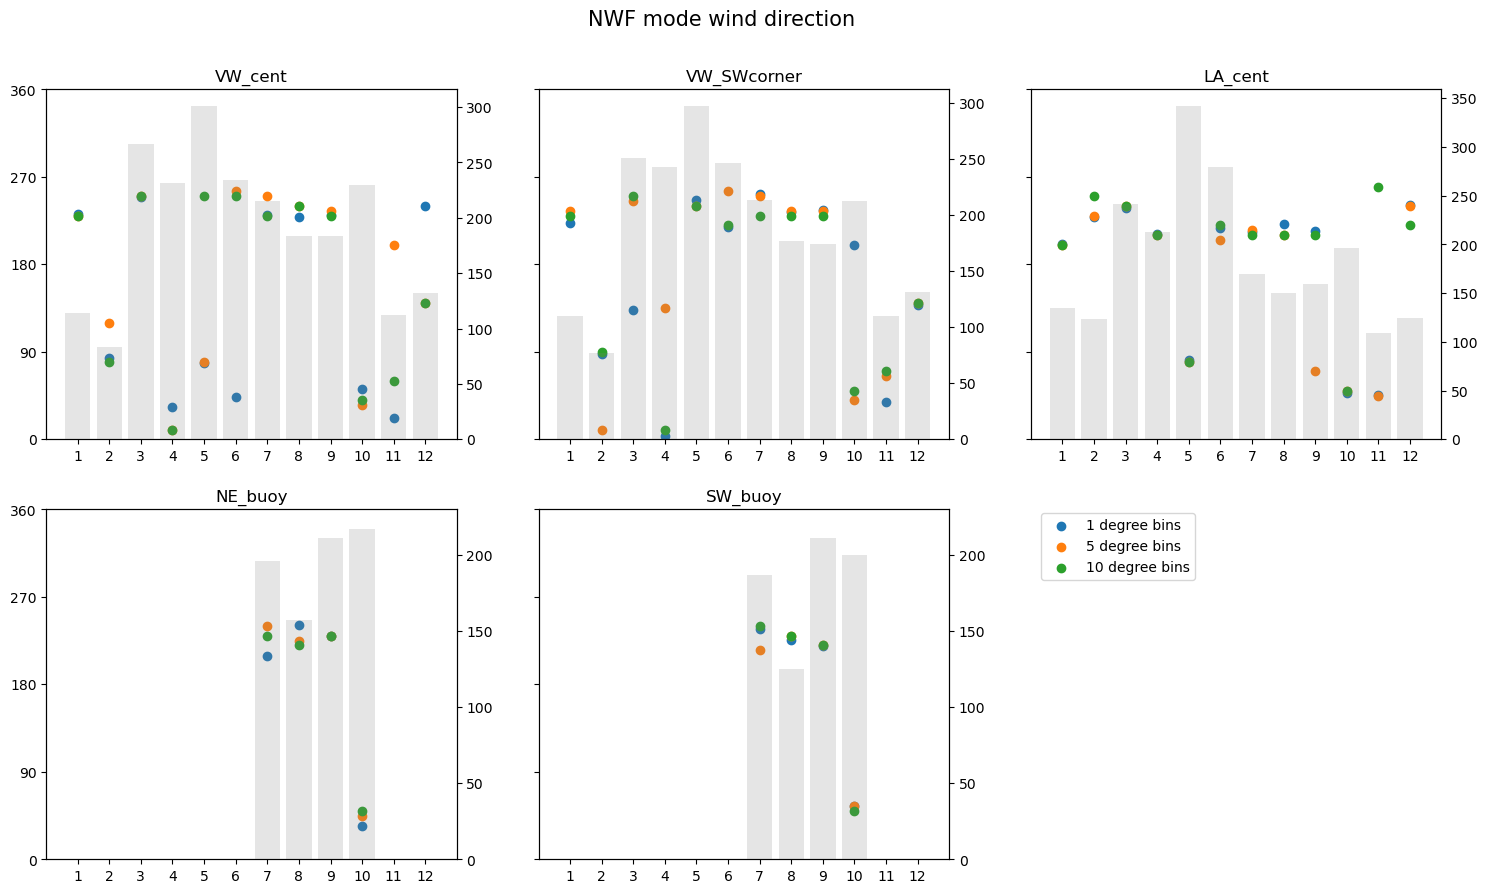

In [28]:
# CODE TO MAKE A PANEL WITH ALL FIVE LOCATIONS

# fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)

# fig.suptitle('NWF mode wind direction', y=0.96, fontsize=15)

# plot_wd(nwf_locs[0], loc_names[0], wf_names[0], axs[0][0])
# plot_wd(nwf_locs[1], loc_names[1], wf_names[1], axs[0][1])
# plot_wd(nwf_locs[2], loc_names[2], wf_names[2], axs[0][2])
# plot_wd_ca(nwf_locs[3], loc_names[3], wf_names[3], axs[1][0])
# plot_wd_ca(nwf_locs[4], loc_names[4], wf_names[4], axs[1][1])

# fig.delaxes(axs[1][2])

# handles, labels = axs[1][1].get_legend_handles_labels()
# fig.legend(handles, labels, loc=(0.7, 0.35))

# # fig.savefig('../output_plots/paper_plots/modewd_panel.png', bbox_inches='tight')

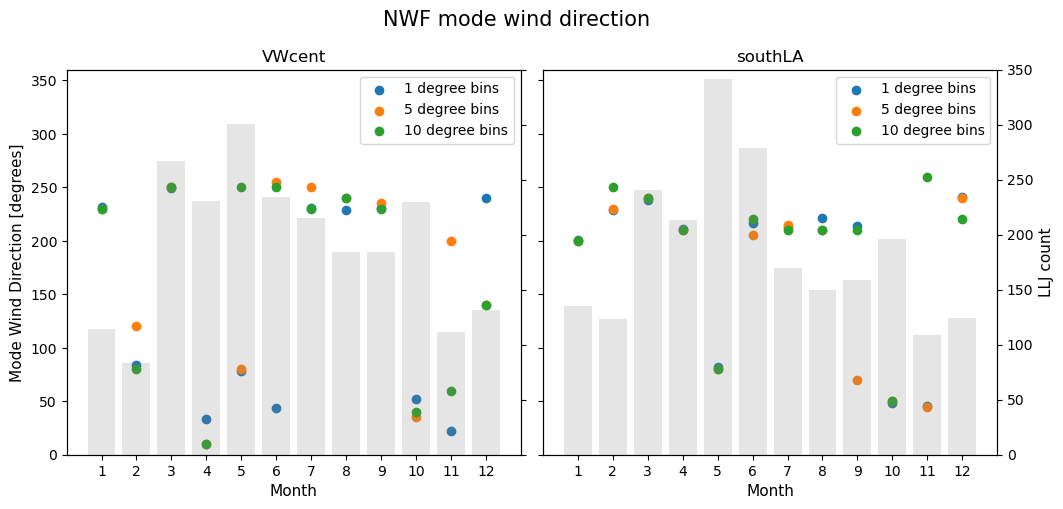

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

fig.suptitle('NWF mode wind direction', y=1, fontsize=15)

plot_wd(nwf_locs[0], loc_names[0], wf_names[0], axs[0], axleft=True)
plot_wd(nwf_locs[1], loc_names[1], wf_names[1], axs[1], axleft=False)
# plot_wd(nwf_locs[2], loc_names[2], wf_names[2], axs[0][2])
# plot_wd_ca(nwf_locs[3], loc_names[3], wf_names[3], axs[1][0])
# plot_wd_ca(nwf_locs[4], loc_names[4], wf_names[4], axs[1][1])

# fig.delaxes(axs[1][2])

# handles, labels = axs[1].get_legend_handles_labels()
# fig.legend(handles, labels, loc=(0.7, 0.35))

for ax in axs:
    ax.legend()
    
plt.subplots_adjust(wspace=0.05)
    
axs[0].set_ylabel('Mode Wind Direction [degrees]', fontsize=11)
# axs[1].set_ylabel('LLJ count')

fig.savefig('../output_plots/paper_plots/modewd_panel2.png', bbox_inches='tight')

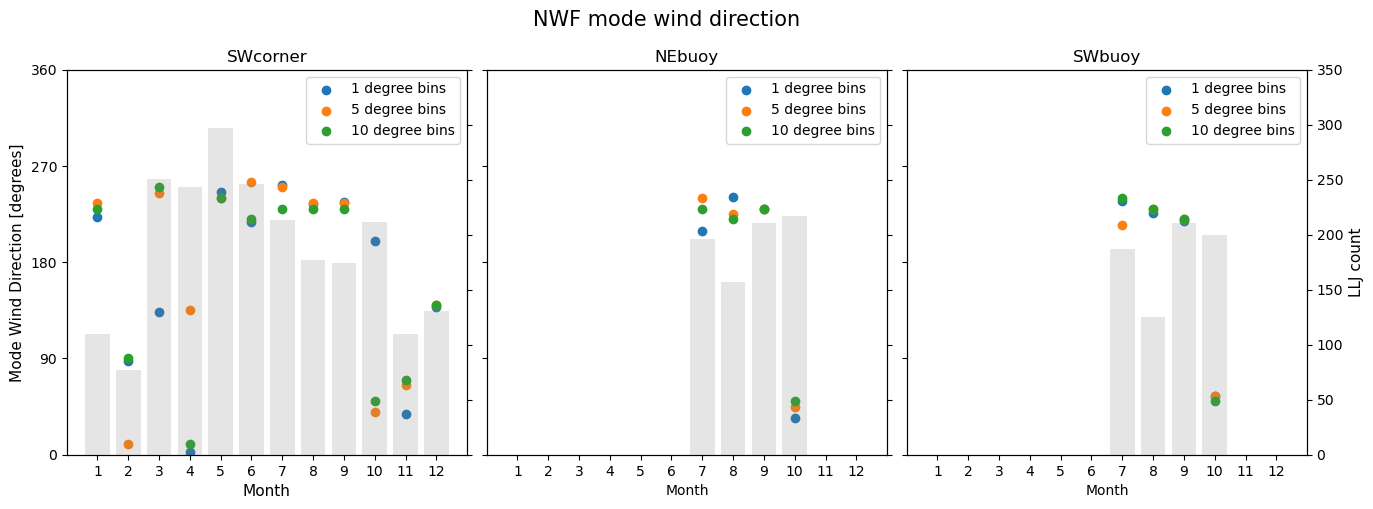

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)

fig.suptitle('NWF mode wind direction', y=1, fontsize=15)

# plot_wd(nwf_locs[0], loc_names[0], wf_names[0], axs[0])
# plot_wd(nwf_locs[1], loc_names[1], wf_names[1], axs[1])
plot_wd(nwf_locs[2], loc_names[2], wf_names[2], axs[0], axleft='left')
plot_wd_ca(nwf_locs[3], loc_names[3], wf_names[3], axs[1], axleft='m')
plot_wd_ca(nwf_locs[4], loc_names[4], wf_names[4], axs[2], axleft='right')

# fig.delaxes(axs[1][2])

# handles, labels = axs[1].get_legend_handles_labels()
# fig.legend(handles, labels, loc=(0.7, 0.35))

for ax in axs:
    ax.legend()
    
plt.subplots_adjust(wspace=0.05)

fig.savefig('../output_plots/paper_plots/modewd_panel3.png', bbox_inches='tight')

### Create panel of wind veer and shear for each location

In [4]:
def plot_veer(nwf, wf, location, wf_name, ax, m1=1, m2=13, axloc='left'):
    if wf_name=='CA100':
        m1=7
        m2=11
    
    nwf.Time = pd.to_datetime(nwf.Time)
    wf.Time = pd.to_datetime(wf.Time)
    
    ax2 = ax.twinx()

    nwf_veer = nwf['Rotor region veer (degrees)'].groupby(nwf.Time.dt.month).mean()
    wf_veer = wf['Rotor region veer (degrees)'].groupby(wf.Time.dt.month).mean()
    nwf_counts = nwf['Rotor region veer (degrees)'].groupby(nwf.Time.dt.month).count().values
    wf_counts = wf['Rotor region veer (degrees)'].groupby(wf.Time.dt.month).count().values
    if location == 'SW_buoy':
        nwf_veer = [12.525383, 7.086912, 0, 4.526873]
        nwf_counts = [71, 21, 0, 5]

    ax2.bar(x=np.arange(m1, m2), 
            height=nwf_counts,
            alpha=0.2,
            color='grey')
    ax2.bar(x=np.arange(m1, m2), 
            height=wf_counts,
            alpha=0.2,
            color='grey')
#     ax.scatter(x=np.arange(m1, m2), y=nwf_veer, marker='*', label='NWF')
#     ax.scatter(x=np.arange(m1, m2), y=wf_veer, marker='^', label=f'{wf_name}')
    ax.plot(np.arange(m1, m2), nwf_veer, linewidth=3, label='NWF')
    ax.plot(np.arange(m1, m2), wf_veer, linewidth=3, linestyle='dashed', label=f'{wf_name}')

    ax.set_title(f'{location}', fontsize=15)
#     ax.set_xlabel('Month', fontsize=14)
    ax.set_xticks(np.arange(m1, m2))
    ax.set_xticklabels(np.arange(m1, m2), fontsize=12)
#     ax.set_ylabel('Veer (degrees)', fontsize=14)
    if axloc=='left':
        ax.set_ylabel('Rotor region wind veer [degrees]', fontsize=11)
        ax.set_yticks(np.arange(0, 18, 3))
#         ax.set_yticklabels(np.arange(0, 18, 3))
#         ax2.set_yticklabels([])
    if axloc=='right':
        ax2.set_ylabel('Number of Values', fontsize=11)
        ax.set_yticklabels([])
    else:
        ax2.set_yticklabels([])
    ax2.set_ylim(0, 350)
    ax.legend()

In [6]:
def plot_shear(nwf, wf, location, wf_name, ax, m1=1, m2=13, axloc='left'):
 
    if wf_name=='CA100':
        m1=7
        m2=11
    
    nwf.Time = pd.to_datetime(nwf.Time)
    wf.Time = pd.to_datetime(wf.Time)
    
    ax2 = ax.twinx()

    nwf_shear = nwf['Rotor region shear (1/s)'].groupby(nwf.Time.dt.month).mean()
    wf_shear = wf['Rotor region shear (1/s)'].groupby(wf.Time.dt.month).mean()
    nwf_counts = nwf['Rotor region shear (1/s)'].groupby(nwf.Time.dt.month).count().values
    wf_counts = wf['Rotor region shear (1/s)'].groupby(wf.Time.dt.month).count().values
    if location == 'SW_buoy':
        nwf_shear = [3.298180, 2.789230, 0, 5.036937]
        nwf_counts = [71, 21, 0, 5]

    ax2.bar(x=np.arange(m1, m2), 
            height=nwf_counts,
            alpha=0.2,
            color='grey')
    ax2.bar(x=np.arange(m1, m2), 
            height=wf_counts,
            alpha=0.2,
            color='grey')
#     ax.scatter(x=np.arange(m1, m2), y=nwf_shear, marker='*', label='NWF')
#     ax.scatter(x=np.arange(m1, m2), y=wf_shear, marker='^', label=f'{wf_name}')
    ax.plot(np.arange(m1, m2), nwf_shear, linewidth=3, label='NWF')
    ax.plot(np.arange(m1, m2), wf_shear, linewidth=3, linestyle='dashed', label=f'{wf_name}')

    print(m1, m2, wf_name, location)
    ax.set_title(f'{location}', fontsize=15)
#     ax.set_xlabel('Month', fontsize=14)
    ax.set_xticks(np.arange(m1, m2))
    ax.set_xticklabels(np.arange(m1, m2), fontsize=12)
#     ax.set_ylabel('Shear (m/s)', fontsize=14)
#     ax2.set_ylabel('Number of Values', fontsize=14)
    
    if axloc=='left':
        print('here')
        ax.set_ylabel('Rotor Region Wind Shear [1/s]', fontsize=11)
        ax2.set_yticklabels([])
    if axloc=='right':
        ax2.set_ylabel('Number of Values', fontsize=11)
        ax.set_yticklabels([])
    else:
        ax2.set_yticklabels([])
        
    ax2.set_ylim(0, 350)
    ax.legend()

#### rework to make veer only plot and then shear only plot

veer

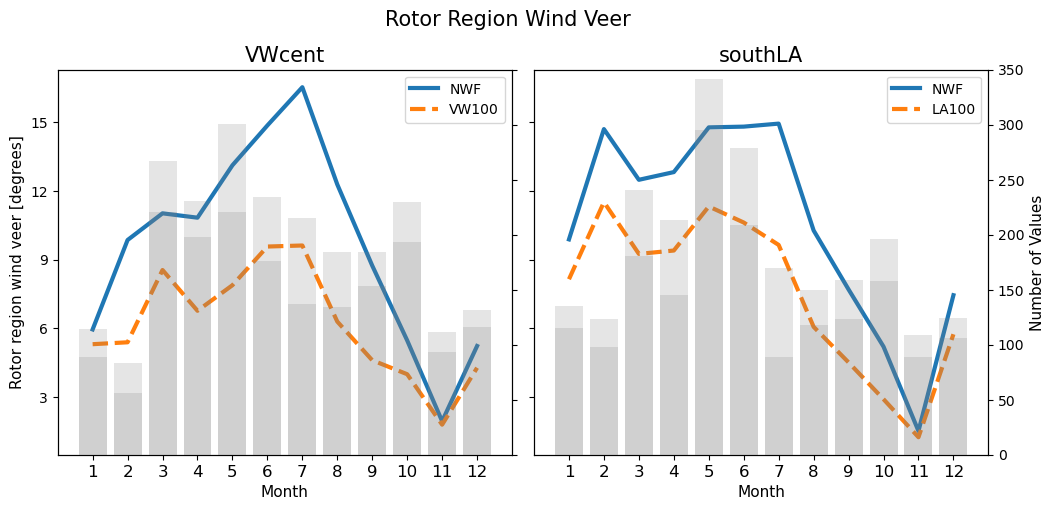

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

fig.suptitle('Rotor Region Wind Veer', y=1, fontsize=15)

plot_veer(nwf_locs[0], wf_locs[0], loc_names[0], wf_names[0], axs[0], axloc='left')
plot_veer(nwf_locs[1], wf_locs[1], loc_names[1], wf_names[1], axs[1], axloc='right')

for ax in axs:
    ax.legend()
    ax.set_xlabel('Month', fontsize=11)
    
axs[0].set_yticklabels(np.arange(0, 18, 3))
    
plt.subplots_adjust(wspace=0.05)

fig.savefig('../output_plots/paper_plots/veer2.png', bbox_inches='tight')

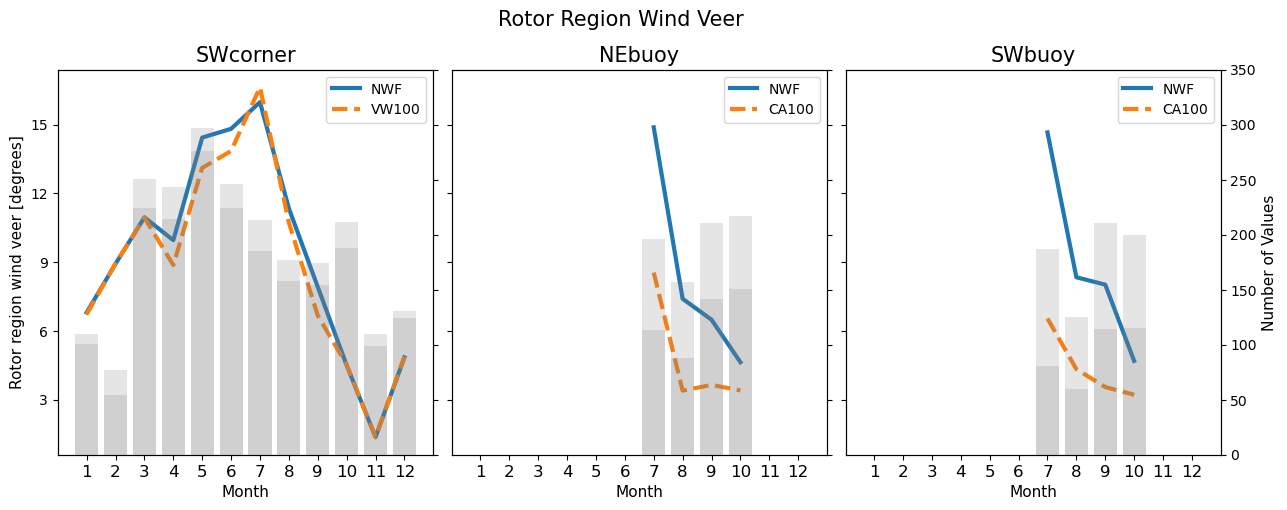

In [149]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

fig.suptitle('Rotor Region Wind Veer', y=1, fontsize=15)

plot_veer(nwf_locs[2], wf_locs[2], loc_names[2], wf_names[2], axs[0], axloc='left')
plot_veer(nwf_locs[3], wf_locs[3], loc_names[3], wf_names[3], axs[1], m1=7, m2=11, axloc='m')
plot_veer(nwf_locs[4], wf_locs[4], loc_names[4], wf_names[4], axs[2], m1=7, m2=11, axloc='right')

for ax in axs:
    ax.legend()
    ax.set_xlabel('Month', fontsize=11)
    ax.set_xticks(np.arange(1, 13))
    ax.set_xticklabels(np.arange(1, 13))
    
axs[0].set_yticklabels(np.arange(0, 18, 3))
    
plt.subplots_adjust(wspace=0.05)

fig.savefig('../output_plots/paper_plots/veer3.png', bbox_inches='tight')

shear

1 13 VW100 VWcent
here
1 13 LA100 southLA


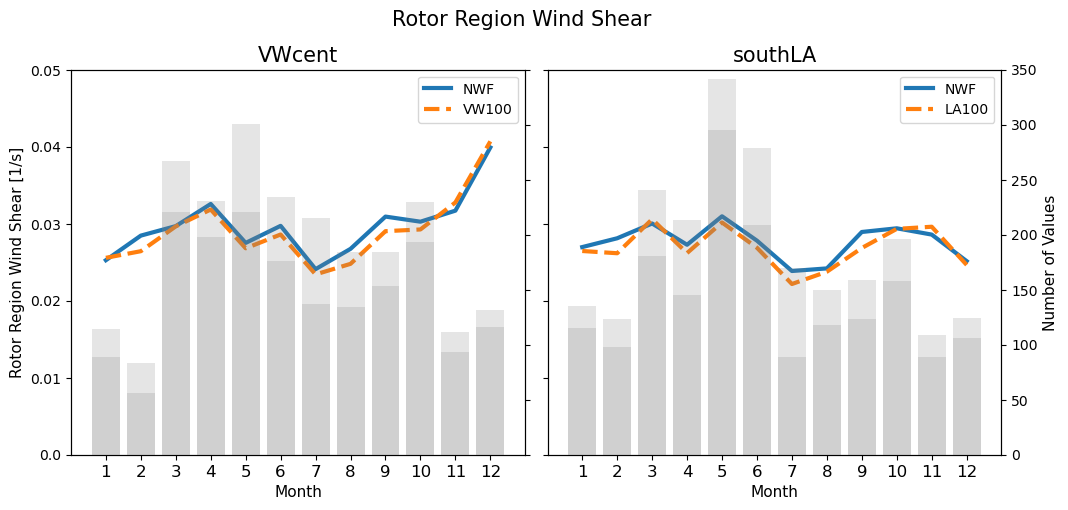

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

fig.suptitle('Rotor Region Wind Shear', y=1, fontsize=15)

plot_shear(nwf_locs[0], wf_locs[0], loc_names[0], wf_names[0], axs[0], axloc='left')
plot_shear(nwf_locs[1], wf_locs[1], loc_names[1], wf_names[1], axs[1], axloc='right')

for ax in axs:
    ax.legend()
    ax.set_xlabel('Month', fontsize=11)
    
axs[0].set_yticks(np.arange(0, 0.06, 0.01))
axs[0].set_yticklabels(np.arange(0, 0.06, 0.01))
    
plt.subplots_adjust(wspace=0.05)

fig.savefig('../output_plots/paper_plots/shear2_s.png', bbox_inches='tight')

1 13 VW100 SWcorner
here
7 11 CA100 NEbuoy
7 11 CA100 SWbuoy


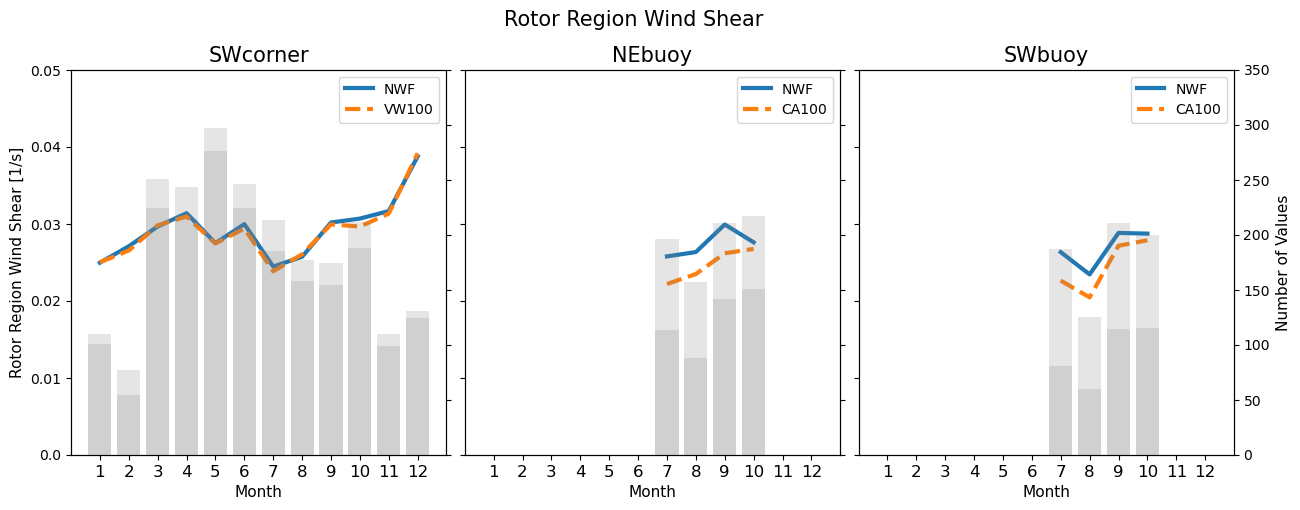

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

fig.suptitle('Rotor Region Wind Shear', y=1, fontsize=15)

plot_shear(nwf_locs[2], wf_locs[2], loc_names[2], wf_names[2], axs[0], axloc='left')
plot_shear(nwf_locs[3], wf_locs[3], loc_names[3], wf_names[3], axs[1], m1=7, m2=11, axloc='m')
plot_shear(nwf_locs[4], wf_locs[4], loc_names[4], wf_names[4], axs[2], m1=7, m2=11, axloc='right')

for ax in axs:
    ax.legend()
    ax.set_xlabel('Month', fontsize=11)
    ax.set_xticks(np.arange(1, 13))
    ax.set_xticklabels(np.arange(1, 13))

axs[0].set_yticks(np.arange(0., 0.06, 0.01))
axs[0].set_yticklabels(np.arange(0, 0.06, 0.01))
    
plt.subplots_adjust(wspace=0.05)

fig.savefig('../output_plots/paper_plots/shear3_s.png', bbox_inches='tight')

previous versions of these plots, code may or may not work

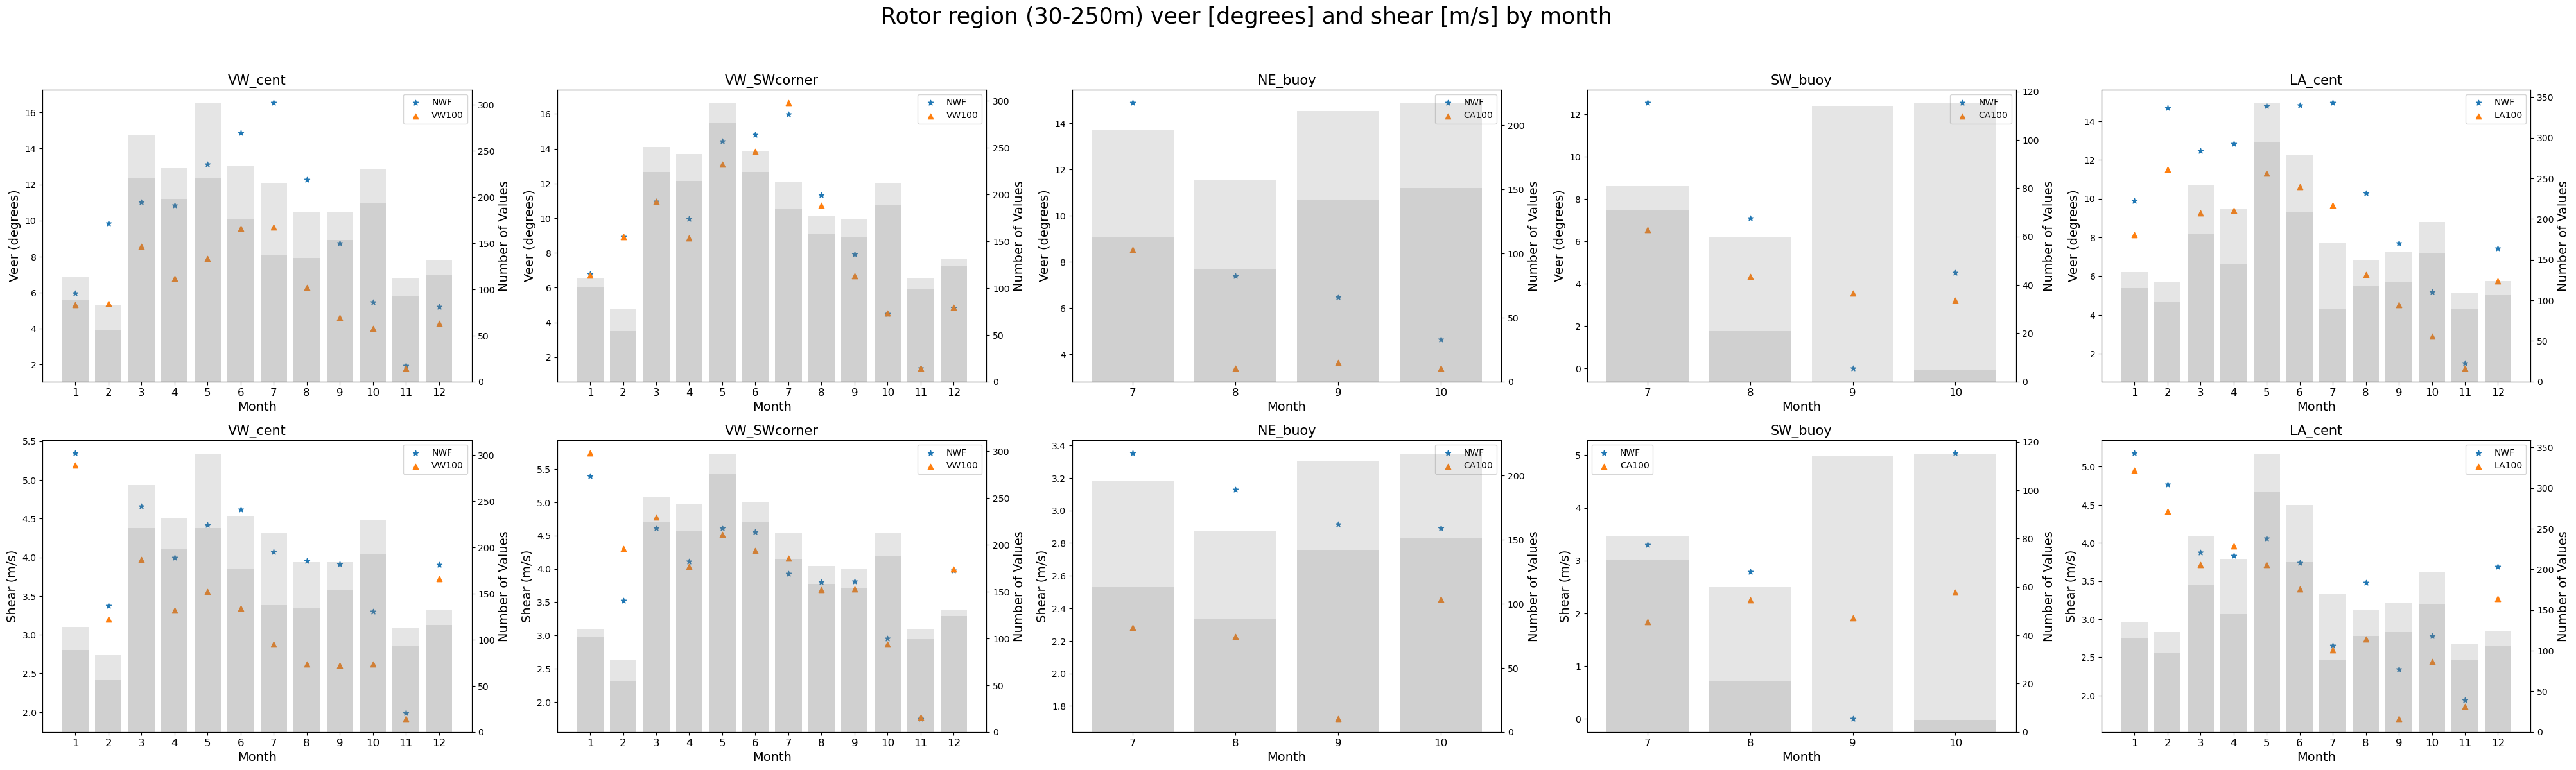

In [5]:
# OLD CODE TO PLOT ALL 5 LOCATIONS BOTH VEER AND SHEAR

# fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(50, 13))

# fig.suptitle('Rotor region (30-250m) veer [degrees] and shear [m/s] by month', fontsize=25)

# for i in range(2):
#     for j in range(5):
#         ax = axs[i][j]

#         if i==0:
#             plot_veer(nwf_locs[j], wf_locs[j], loc_names[j], wf_names[j], ax)
#         else:
#             plot_shear(nwf_locs[j], wf_locs[j], loc_names[j], wf_names[j], ax)
# # fig.savefig('../detection2/panels/vs_panel.png', bbox_inches='tight')

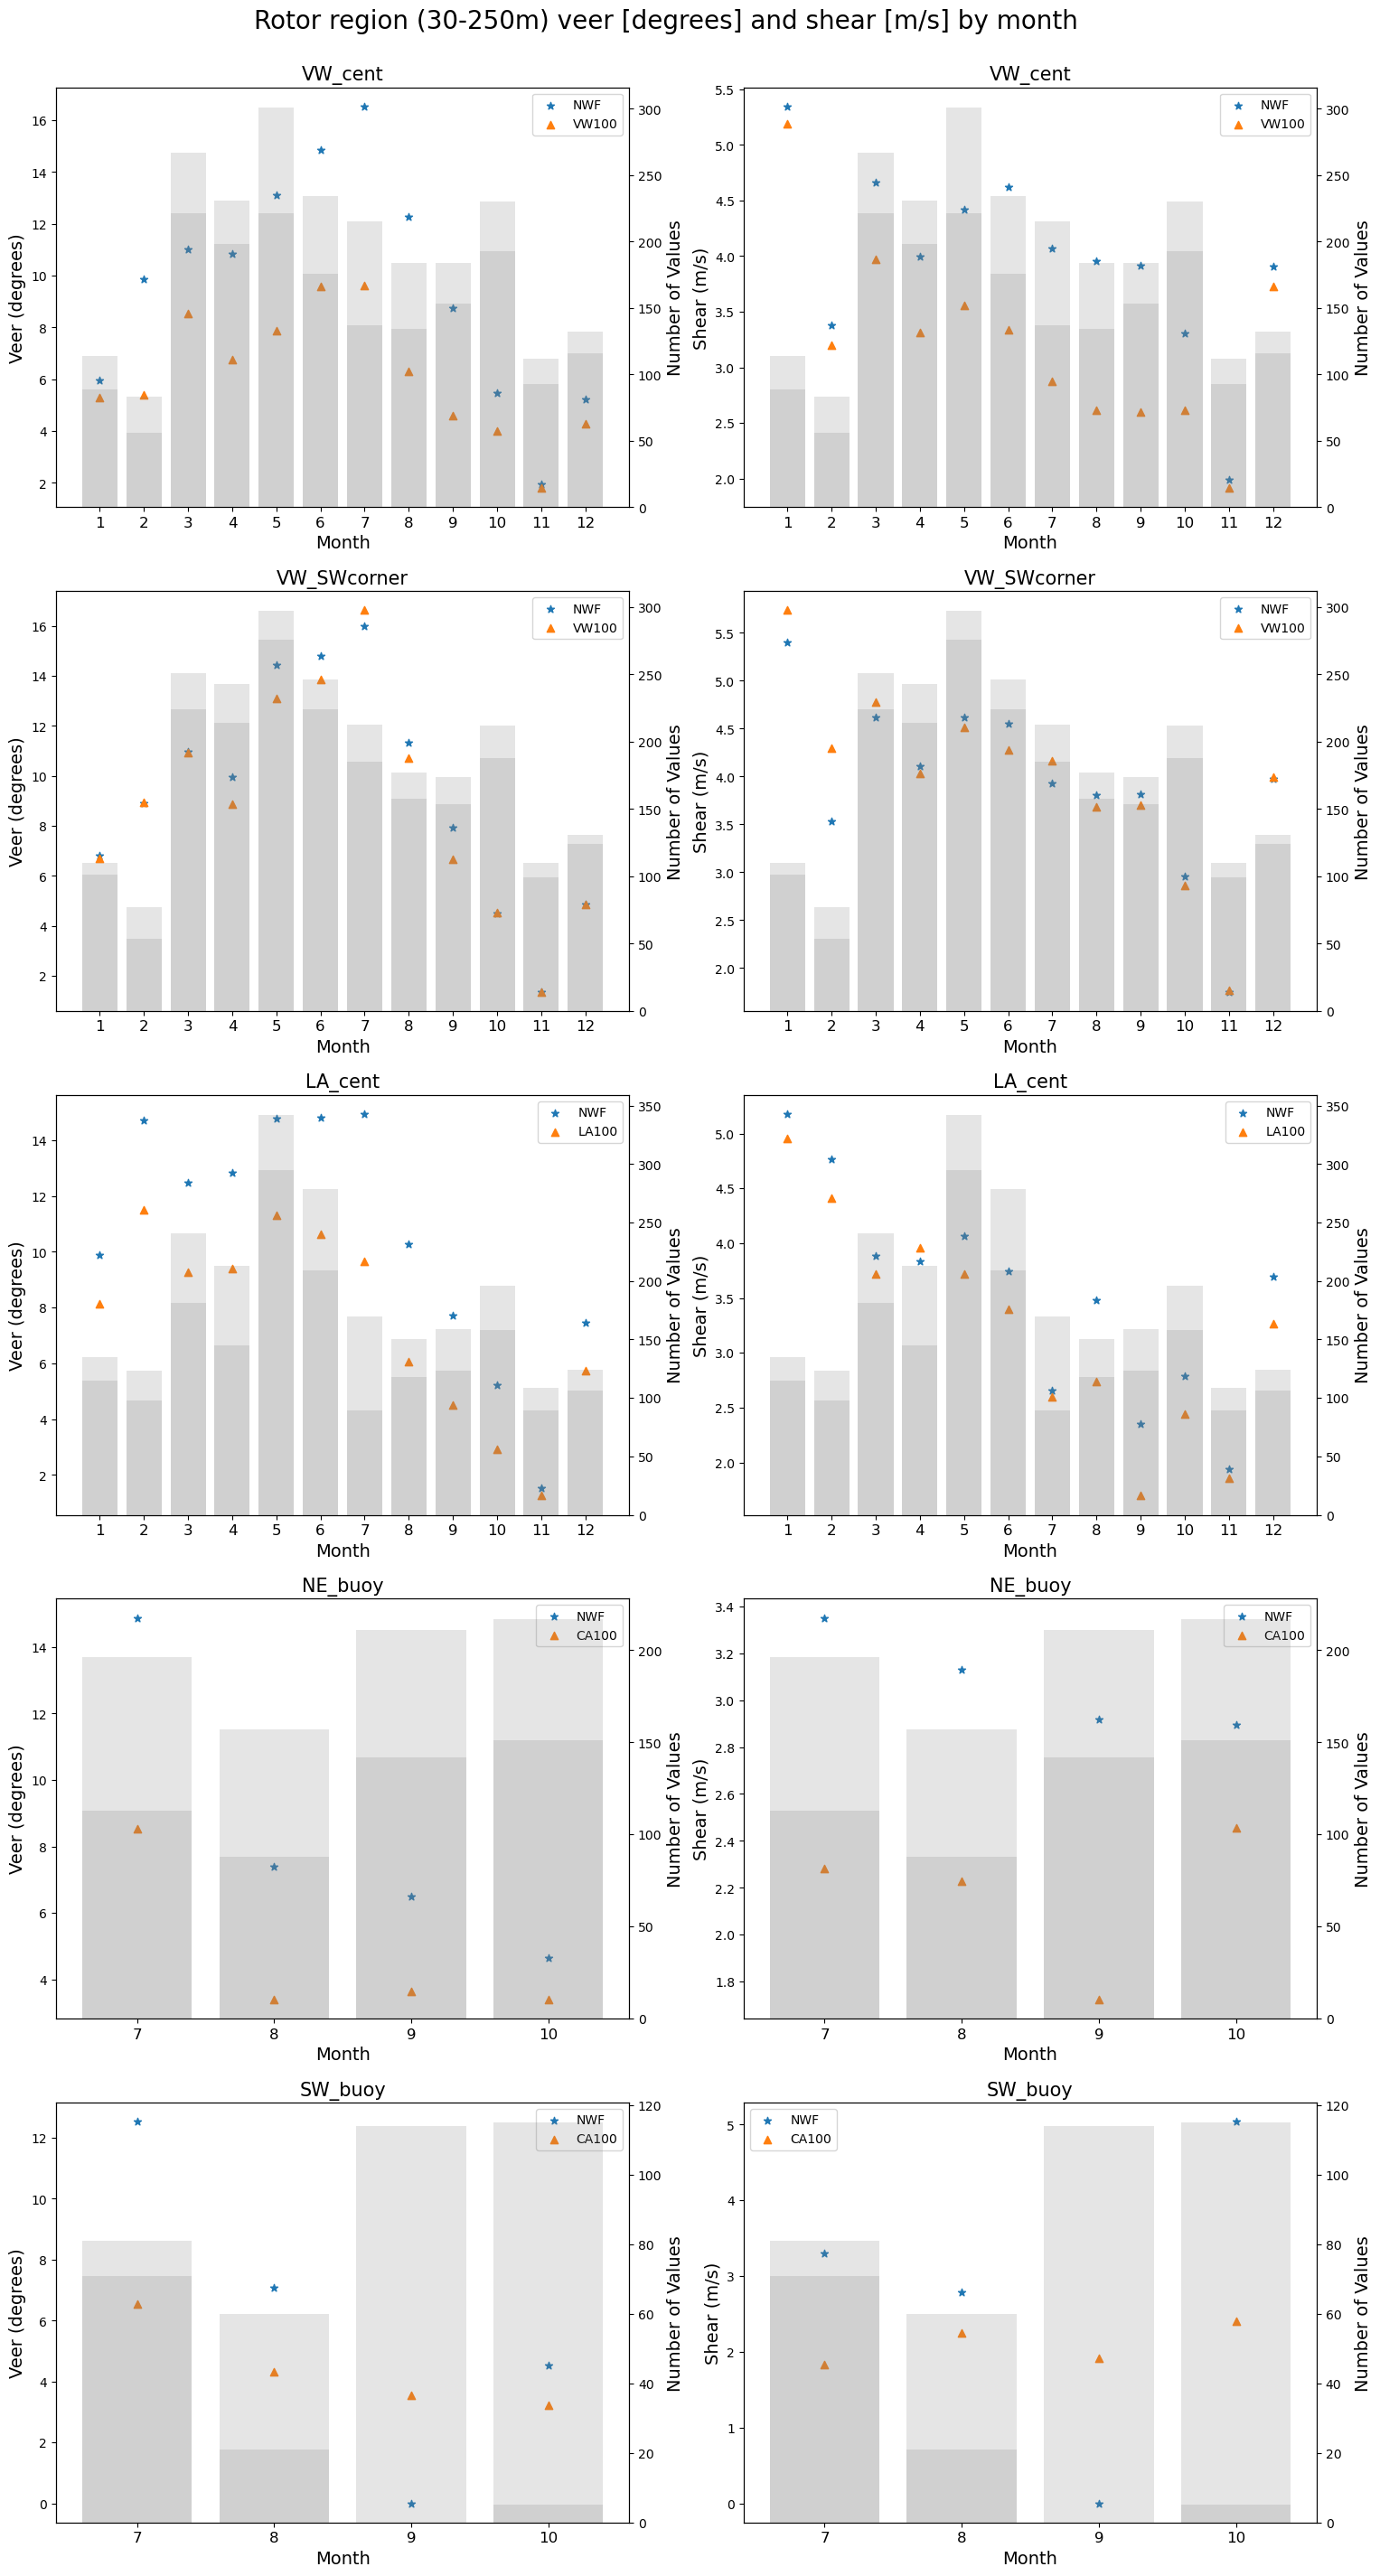

In [7]:
# VEER AND SHEAR IN SAME PLOT VERTICAL ALL 5 LOCATIONS

# fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(18, 35))

# fig.suptitle('Rotor region (30-250m) veer [degrees] and shear [m/s] by month', y=0.905, fontsize=20)

# for i in range(5):
#     for j in range(2):
#         ax = axs[i][j]

#         if j%2==0:
#             plot_veer(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], ax)
#         else:
#             plot_shear(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], ax)
# # fig.savefig('../output_plots/paper_plots/vs_panel_vert.png', bbox_inches='tight')

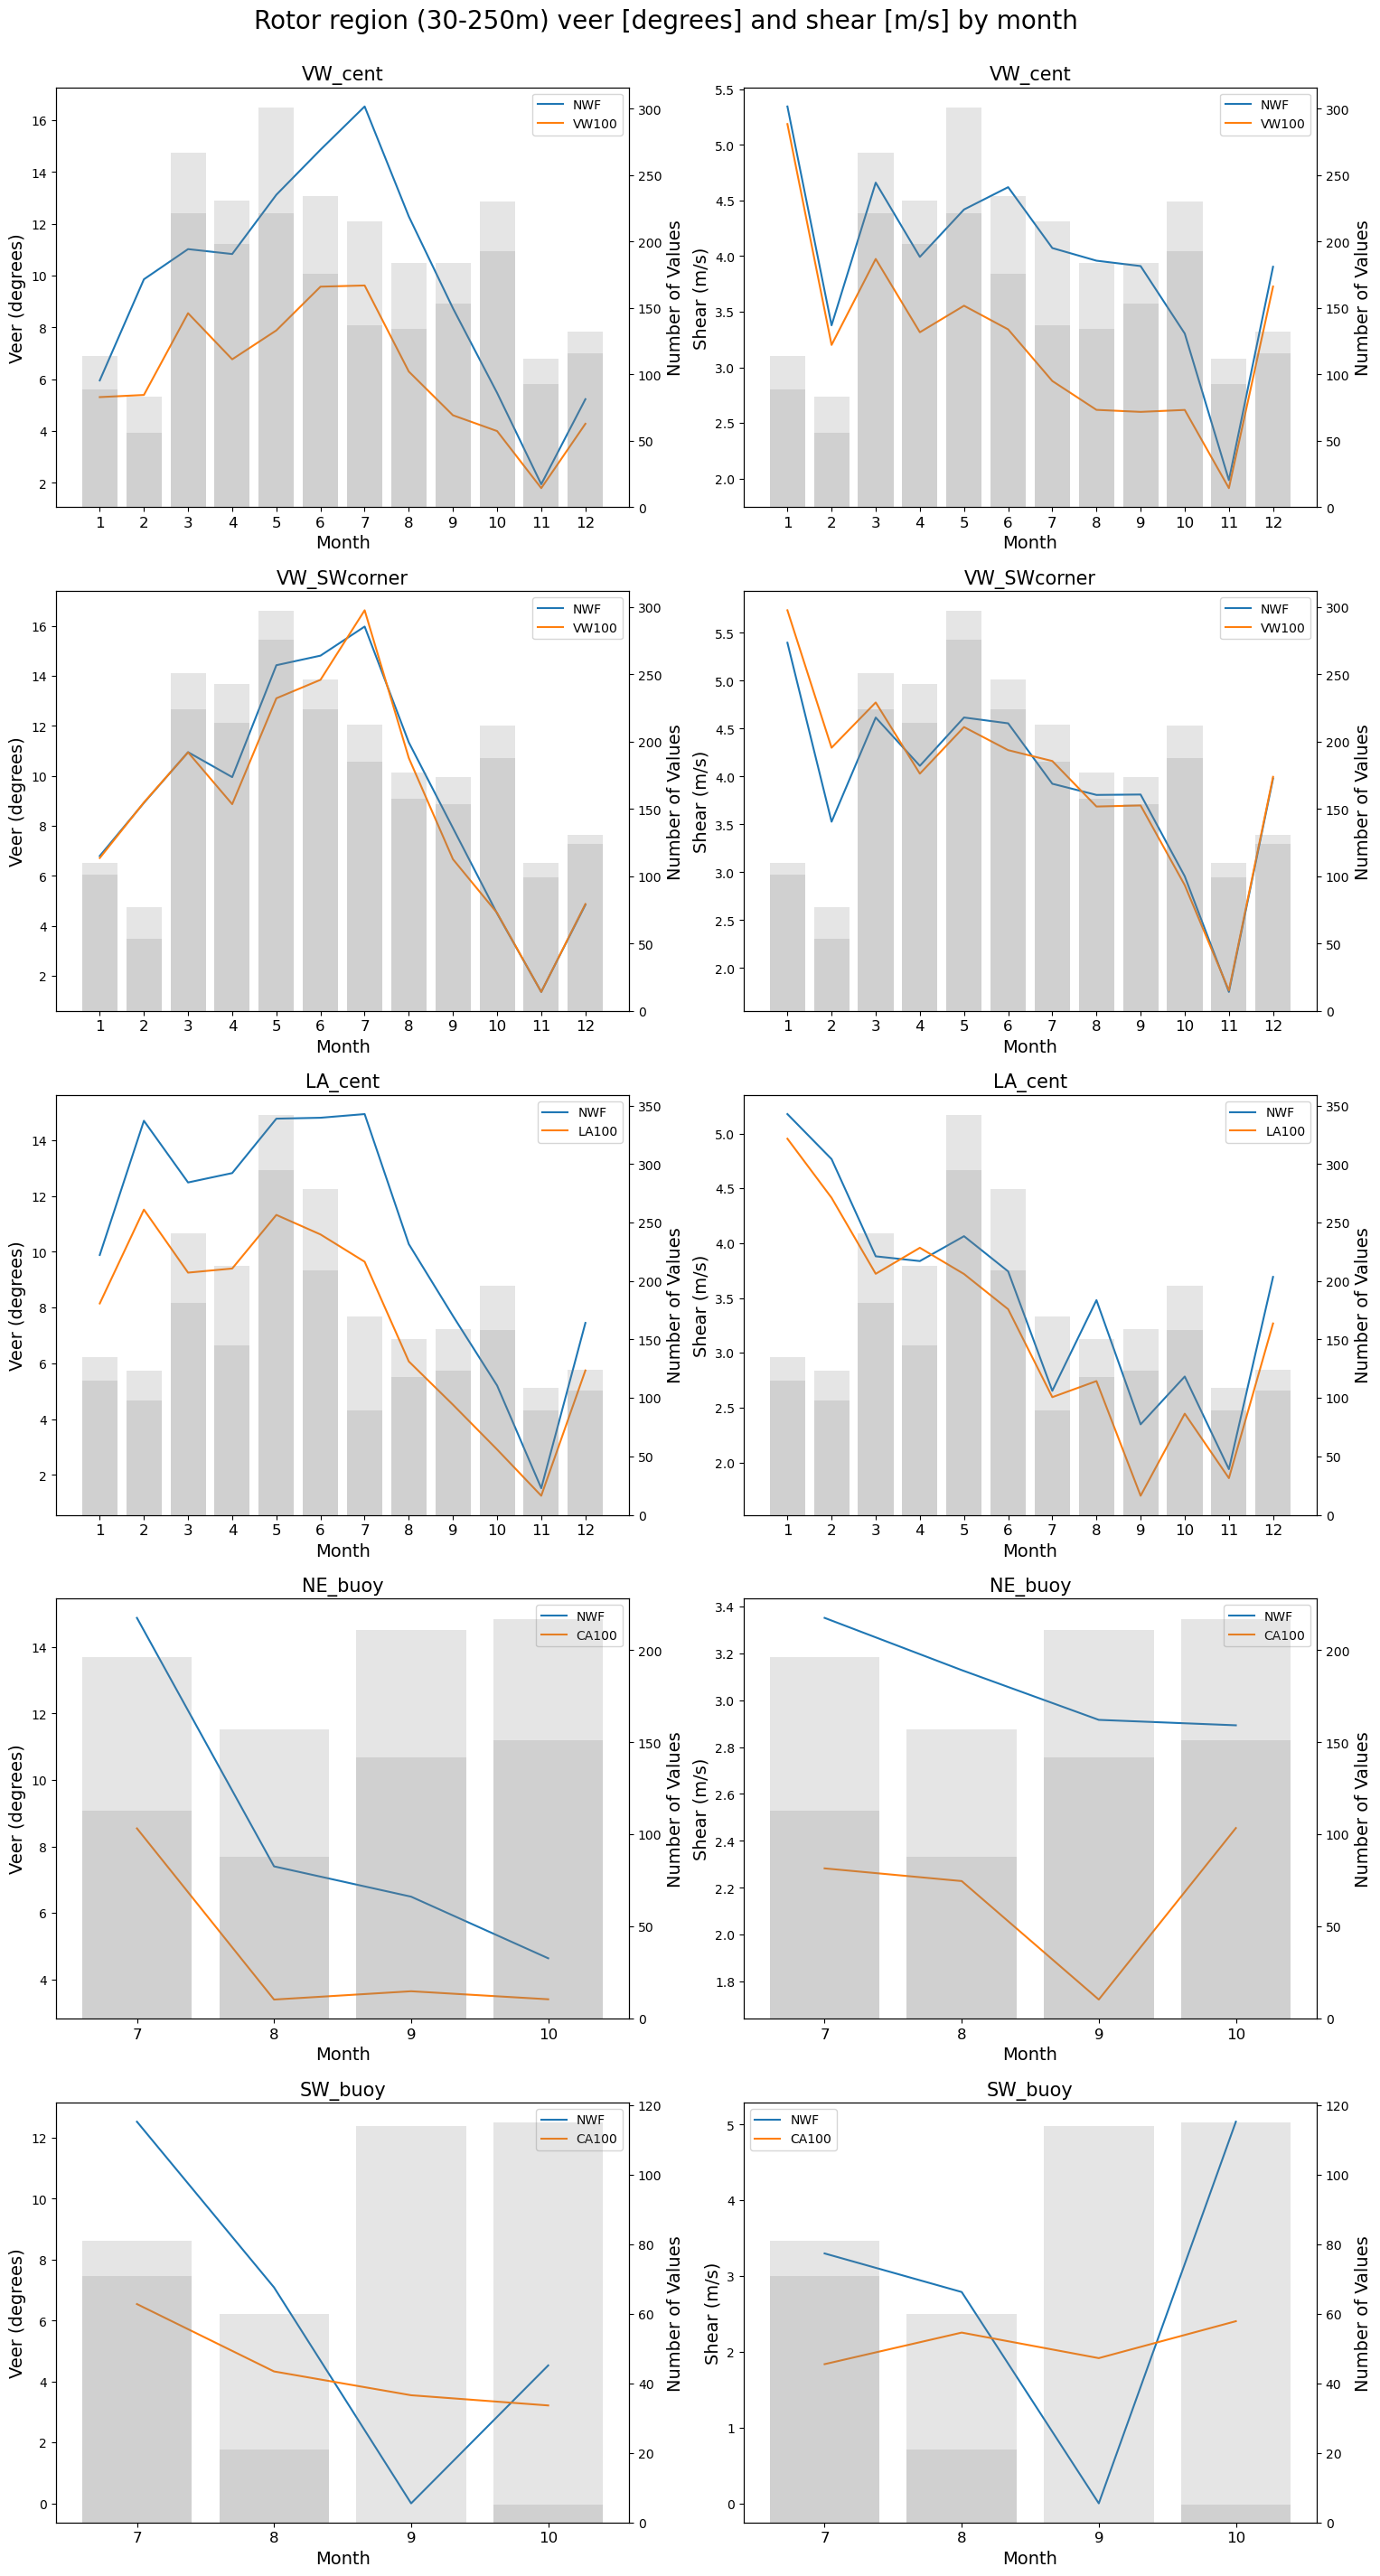

In [13]:
# try to make it a line plot
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(18, 35))

fig.suptitle('Rotor region (30-250m) veer [degrees] and shear [m/s] by month', y=0.905, fontsize=20)

for i in range(5):
    for j in range(2):
        ax = axs[i][j]

        if j%2==0:
            plot_veer(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], ax)
        else:
            plot_shear(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], ax)
# fig.savefig('../output_plots/paper_plots/vs_panel_vert.png', bbox_inches='tight')

1 13 VW100 VW_cent
1 13 LA100 LA_cent


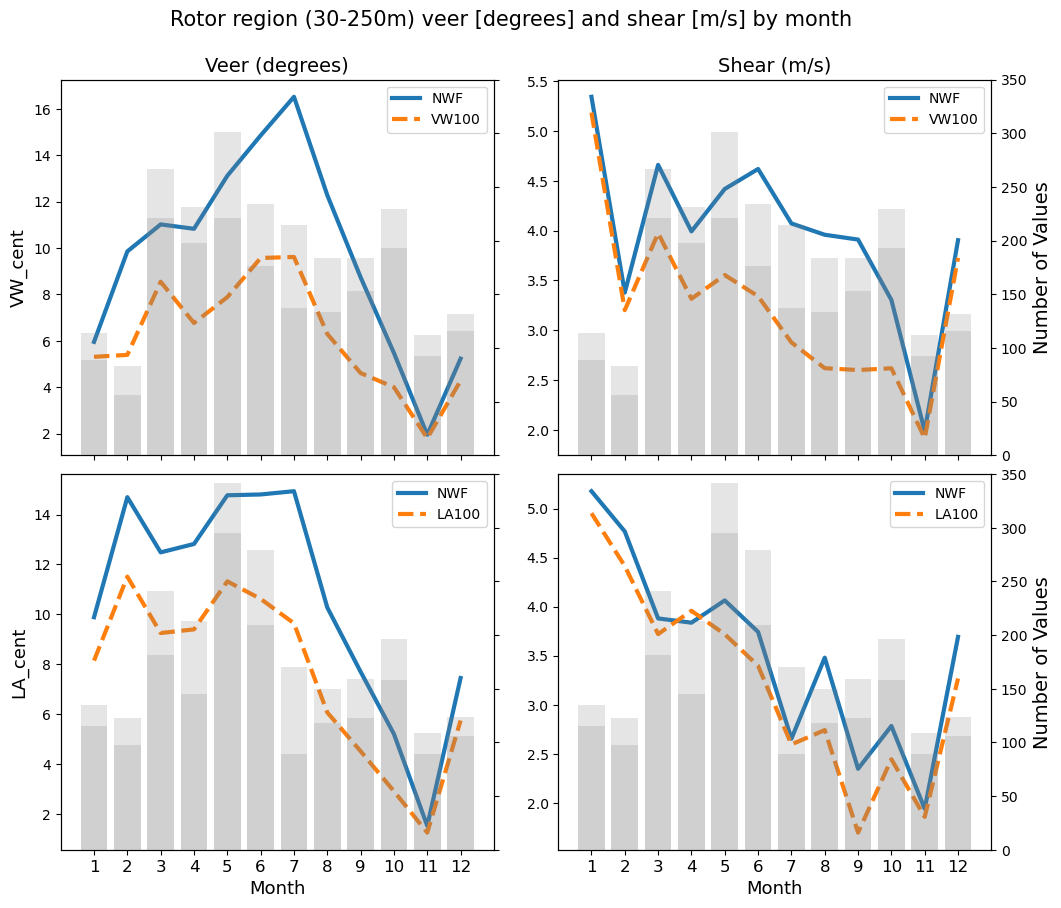

In [17]:
# NOT FINAL VERSION OF PLOT, DECIDED TO SPLIT VEER AND SHEAR INTO SEPARATE PLOTS

# # try to make it a line plot
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharex=True)

# fig.suptitle('Rotor region (30-250m) veer [degrees] and shear [m/s] by month', y=0.95, fontsize=15)

# for i in range(2):
#     for j in range(2):
#         ax = axs[i][j]

#         if j%2==0:
#             plot_veer(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], ax, labely=False)
#         else:
#             plot_shear(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], ax)
            
# axs[0][0].set_title('Veer (degrees)', fontsize=14)
# axs[0][1].set_title('Shear (m/s)', fontsize=14)
# axs[1][0].set_xlabel('Month', fontsize=13)
# axs[1][1].set_xlabel('Month', fontsize=13)

# for i in range(2):
#     axs[i][0].set_ylabel(loc_names[i], fontsize=13)
    
# plt.subplots_adjust(hspace=0.05, wspace=0.15)
            
# fig.savefig('../output_plots/paper_plots/vs_panel_vert2.png', bbox_inches='tight')

In [15]:
# # try to make it a line plot
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

# fig.suptitle('Rotor region (30-250m) veer [degrees] and shear [m/s] by month', y=0.95, fontsize=15)

# for i in range(3):
#     for j in range(2):
#         ax = axs[i][j]

#         if j%2==0:
#             plot_veer(nwf_locs[i+2], wf_locs[i+2], loc_names[i+2], wf_names[i+2], ax, labely=False)
#         else:
#             plot_shear(nwf_locs[i+2], wf_locs[i+2], loc_names[i+2], wf_names[i+2], ax)

# axs[0][0].set_title('Veer (degrees)', fontsize=12)
# axs[0][1].set_title('Shear (m/s)', fontsize=12)
# axs[2][0].set_xlabel('Month')
# axs[2][1].set_xlabel('Month')

# for i in range(3):
#     axs[i][0].set_ylabel(loc_names[i+2], fontsize=12, labelpad=20)
            
# # fig.savefig('../output_plots/paper_plots/vs_panel_vert3.png', bbox_inches='tight')

1 13 VW100 VW_SWcorner
7 11 CA100 NE_buoy
7 11 CA100 SW_buoy


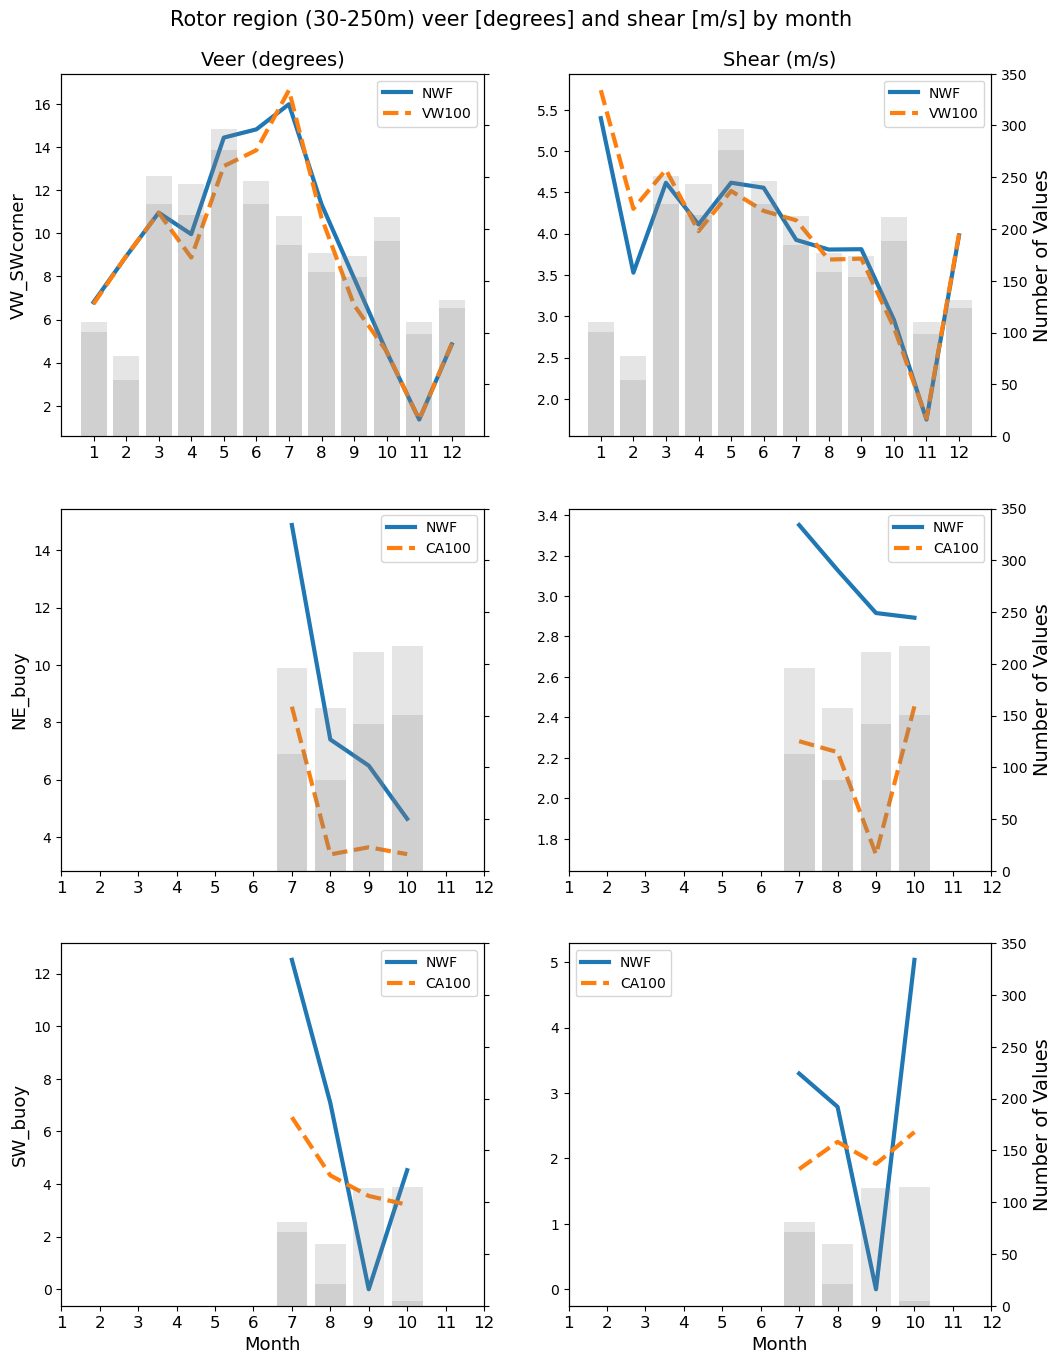

In [18]:
# NOT FINAL VERSION OF PLOT

# # try to make it a line plot
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

# fig.suptitle('Rotor region (30-250m) veer [degrees] and shear [m/s] by month', y=0.92, fontsize=15)

# for i in range(3):
#     for j in range(2):
#         ax = axs[i][j]

#         if j%2==0:
#             plot_veer(nwf_locs[i+2], wf_locs[i+2], loc_names[i+2], wf_names[i+2], ax, labely=False)
#         else:
#             plot_shear(nwf_locs[i+2], wf_locs[i+2], loc_names[i+2], wf_names[i+2], ax)
            
# axs[0][0].set_title('Veer (degrees)', fontsize=14)
# axs[0][1].set_title('Shear (m/s)', fontsize=14)
# axs[2][0].set_xlabel('Month', fontsize=13)
# axs[2][1].set_xlabel('Month', fontsize=13)

# for i in range(3):
#     axs[i][0].set_ylabel(loc_names[i+2], fontsize=13)
    
# for i in range(3):
#     for j in range(2):
#         axs[i][j].set_xticks(range(1, 13))
#         axs[i][j].set_xticklabels(range(1, 13))
            
# fig.savefig('../output_plots/paper_plots/vs_panel_vert3.png', bbox_inches='tight')

end previous versions of veer/shear plots

### Create panel of seasonal cycle for each location

In [11]:
def plot_season(nwf, wf, location, wf_name, ax, m1=1, m2=13, low=True):
    
    if low:
        # select low jet data
        low_nwf = nwf[nwf['Nose height (meters)']<=260]
        low_nwf.Time = pd.to_datetime(low_nwf.Time)
        low_wf = wf[wf['Nose height (meters)']<=260]
        low_wf.Time = pd.to_datetime(low_wf.Time)
    
    nwf = nwf.dropna()
    wf = wf.dropna()
    
    nwf.Time = pd.to_datetime(nwf.Time)
    wf.Time = pd.to_datetime(wf.Time)

    ax.plot(nwf.Time.groupby(nwf.Time.dt.month).count().index, 
           nwf.Time.groupby(nwf.Time.dt.month).count().values,
           label='NWF')

    ax.plot(wf.Time.groupby(wf.Time.dt.month).count().index, 
           wf.Time.groupby(wf.Time.dt.month).count().values,
           label=wf_name,
           linestyle='dashed',
           color='#1f77b4')
    if low:
        if location == 'NE_buoy':
            x = np.arange(7, 11)
            y = np.zeros(4)
        elif location == 'SW_buoy':
            x = np.arange(7, 11)
            y = np.array([1, 0, 1, 0])
        else:
            x = low_wf.Time.groupby(low_wf.Time.dt.month).count().index
            y = low_wf.Time.groupby(low_wf.Time.dt.month).count().values

        ax.plot(low_nwf.Time.groupby(low_nwf.Time.dt.month).count().index, 
                low_nwf.Time.groupby(low_nwf.Time.dt.month).count().values,
                label='NWF - low jets',
                color='k')
        ax.plot(x, 
                y,
                label=wf_name+ ' - low jets',
                color='k',
                linestyle='dashed')

    ax.set_xticks(np.arange(m1, m2))
    ax.set_xlabel('Month', fontsize=12)
#     ax.set_ylabel('Number of LLJs')
    ax.set_title(location)
    ax.legend();

old versions of seasonal plots

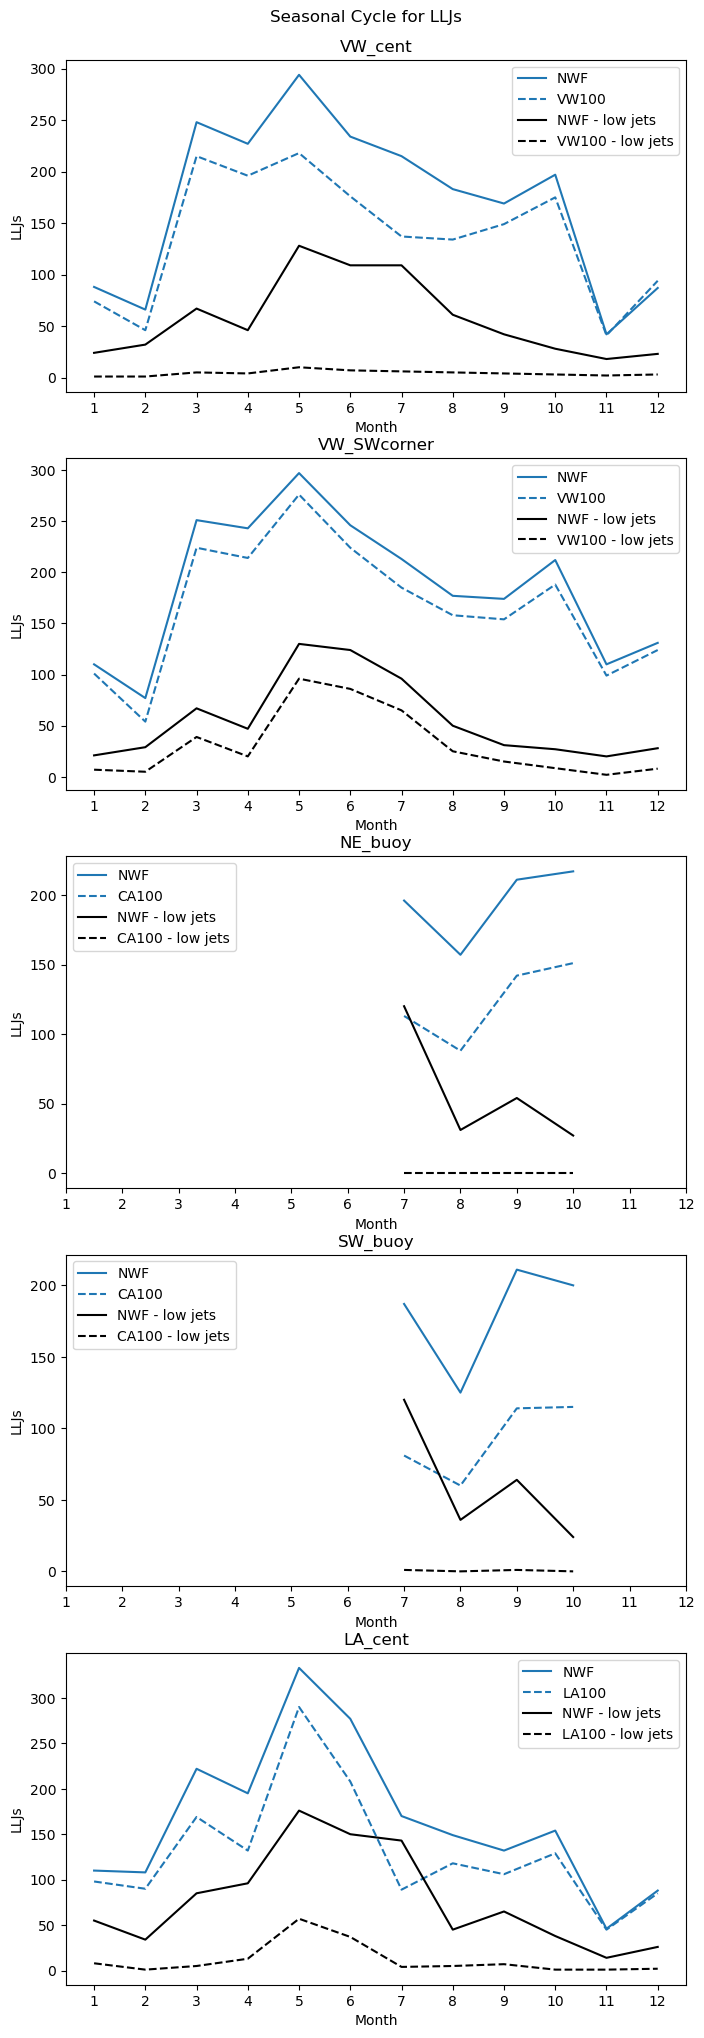

In [22]:
# ALL 5 LOCATIONS IN ONE PLOT - NOT USING

# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8, 25))

# fig.suptitle('Seasonal Cycle for LLJs', y=0.9, fontsize=12)

# for i in range(5):
#     plot_season(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], axs[i])

# # fig.savefig('../detection2/panels/seasonal_panel.png', bbox_inches='tight')

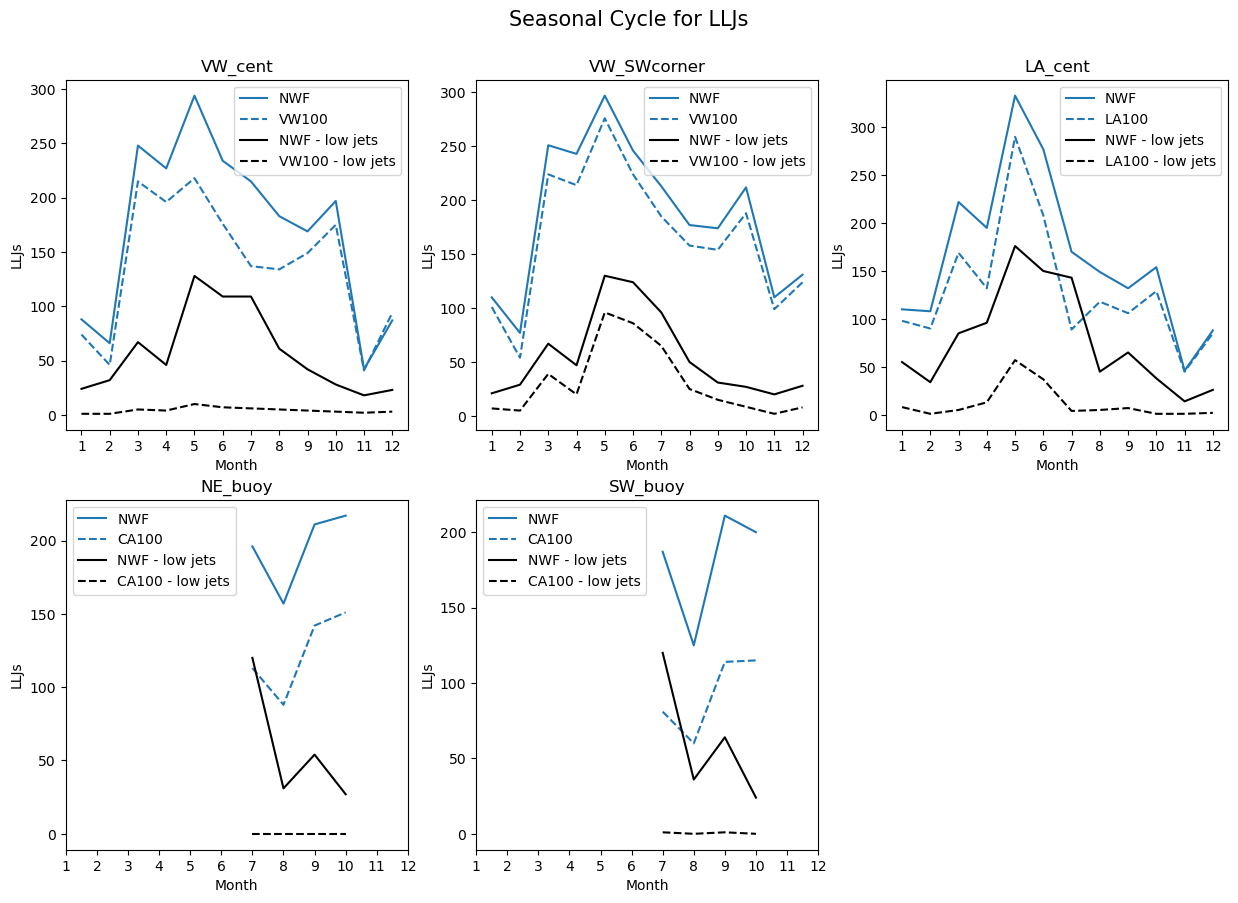

In [19]:
# ALL 5 LOCATIONS IN ONE PLOT - NOT USING

# fig = plt.figure(figsize=(15,10))
# columns = 3
# rows = 2
# fig.suptitle('Seasonal Cycle for LLJs', y=0.95, fontsize=15)
# for i in range(1, 6):
#     ax = fig.add_subplot(rows, columns, i)
#     plot_season(nwf_locs[i-1], wf_locs[i-1], loc_names[i-1], wf_names[i-1], ax)
    
# fig.savefig('../output_plots/paper_plots/seasonal_panel.png', bbox_inches='tight')

end old versions of seasonal plots

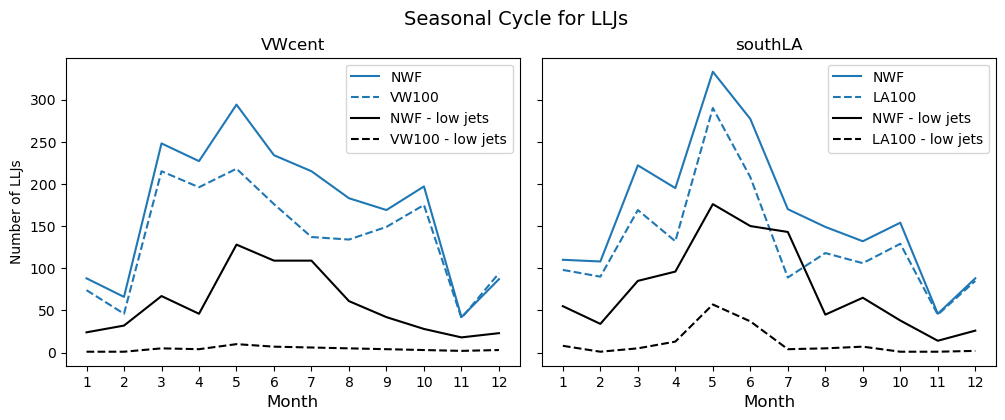

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)

fig.suptitle('Seasonal Cycle for LLJs', y=1, fontsize=14)
for i in range(2):
    ax = axs[i]
    plot_season(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], ax)
    
plt.subplots_adjust(wspace=0.05)
axs[0].set_ylabel('Number of LLJs')

fig.savefig('../output_plots/paper_plots/seasonal_panel2.png', bbox_inches='tight')

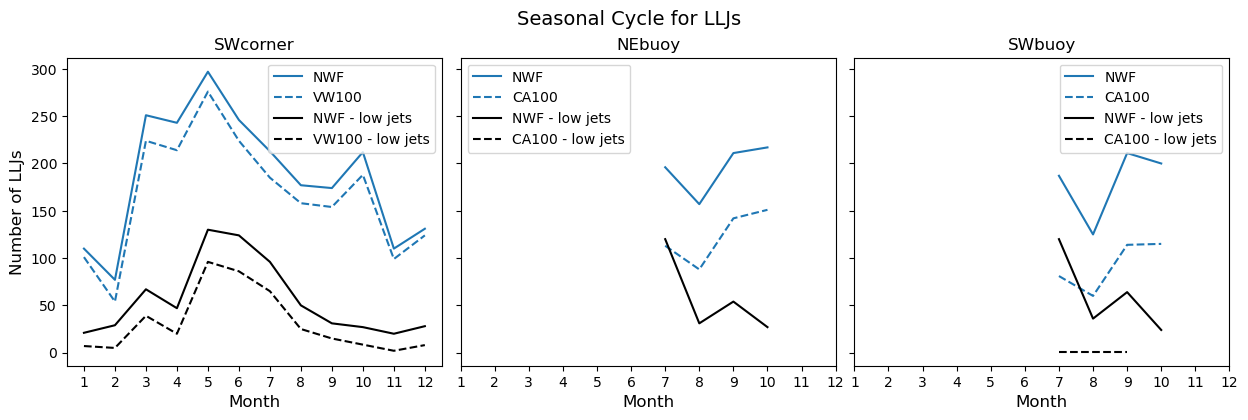

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)

fig.suptitle('Seasonal Cycle for LLJs', y=1, fontsize=14)
for i in range(3):
    ax = axs[i]
    plot_season(nwf_locs[i+2], wf_locs[i+2], loc_names[i+2], wf_names[i+2], ax)

for i in range(3):
    axs[i].set_xticks(np.arange(1, 13))
    axs[i].set_xticklabels(np.arange(1, 13))
plt.subplots_adjust(wspace=0.05)
axs[0].set_ylabel('Number of LLJs', fontsize=12)

fig.savefig('../output_plots/paper_plots/seasonal_panel3.png', bbox_inches='tight')

### Creat panel of diurnal cycle for each location

In [15]:
def plot_daily(nwf, wf, location, wf_name, ax, low=True):
    
    if low:
        # select low jet data
        low_nwf = nwf[nwf['Nose height (meters)']<=260]
        low_nwf.Time = pd.to_datetime(low_nwf.Time)
        low_wf = wf[wf['Nose height (meters)']<=260]
        low_wf.Time = pd.to_datetime(low_wf.Time)
    
    nwf = nwf.dropna()
    wf = wf.dropna()
    
    nwf.Time = pd.to_datetime(nwf.Time)
    wf.Time = pd.to_datetime(wf.Time)
   
    ax2 = ax.twiny()

    ax.plot(nwf.Time.groupby(nwf.Time.dt.hour).count().index, 
           nwf.Time.groupby(nwf.Time.dt.hour).count().values,
           label='NWF')
    ax.plot(wf.Time.groupby(wf.Time.dt.hour).count().index, 
           wf.Time.groupby(wf.Time.dt.hour).count().values,
           label=wf_name,
           linestyle='dashed',
           color='#1f77b4')
    if low:
        if location == 'NE_buoy':
            x = np.arange(0, 24)
            y = np.zeros(24)
        elif location == 'SW_buoy':
            x = np.arange(0, 24)
            y = np.zeros(24)
            y[14] = 1
            y[22] = 1
        else:
            x =  low_wf.Time.groupby(low_wf.Time.dt.hour).count().index
            y = low_wf.Time.groupby(low_wf.Time.dt.hour).count().values

        ax.plot(low_nwf.Time.groupby(low_nwf.Time.dt.hour).count().index, 
                low_nwf.Time.groupby(low_nwf.Time.dt.hour).count().values,
                label='NWF - low jets',
                color='k')
        ax.plot(x, 
                y,
                label=wf_name+ ' - low jets',
                color='k',
                linestyle='dashed')

    ax2.plot(nwf.Time.groupby(nwf.Time.dt.hour).count().index, 
           nwf.Time.groupby(nwf.Time.dt.hour).count().values,
           label='NWF')
    ax2.plot(wf.Time.groupby(wf.Time.dt.hour).count().index, 
           wf.Time.groupby(wf.Time.dt.hour).count().values, 
           label=wf_name,
            linestyle='dashed',
            color='#1f77b4')

    ax.set_xticks(np.arange(0, 24, 2))
    ax2.set_xticks(ax.get_xticks())
    ax2.set_xticklabels((np.arange(0, 24, 2) - 5) % 24)

    ax2.set_xlabel('Hour of the Day (EST)', labelpad=10)
    ax.set_xlabel('Hour of the day (UTC)')
#     ax.set_ylabel('LLJs')

    ax.set_title(location, y=1.15)
    ax.legend()

old versions of daily plot

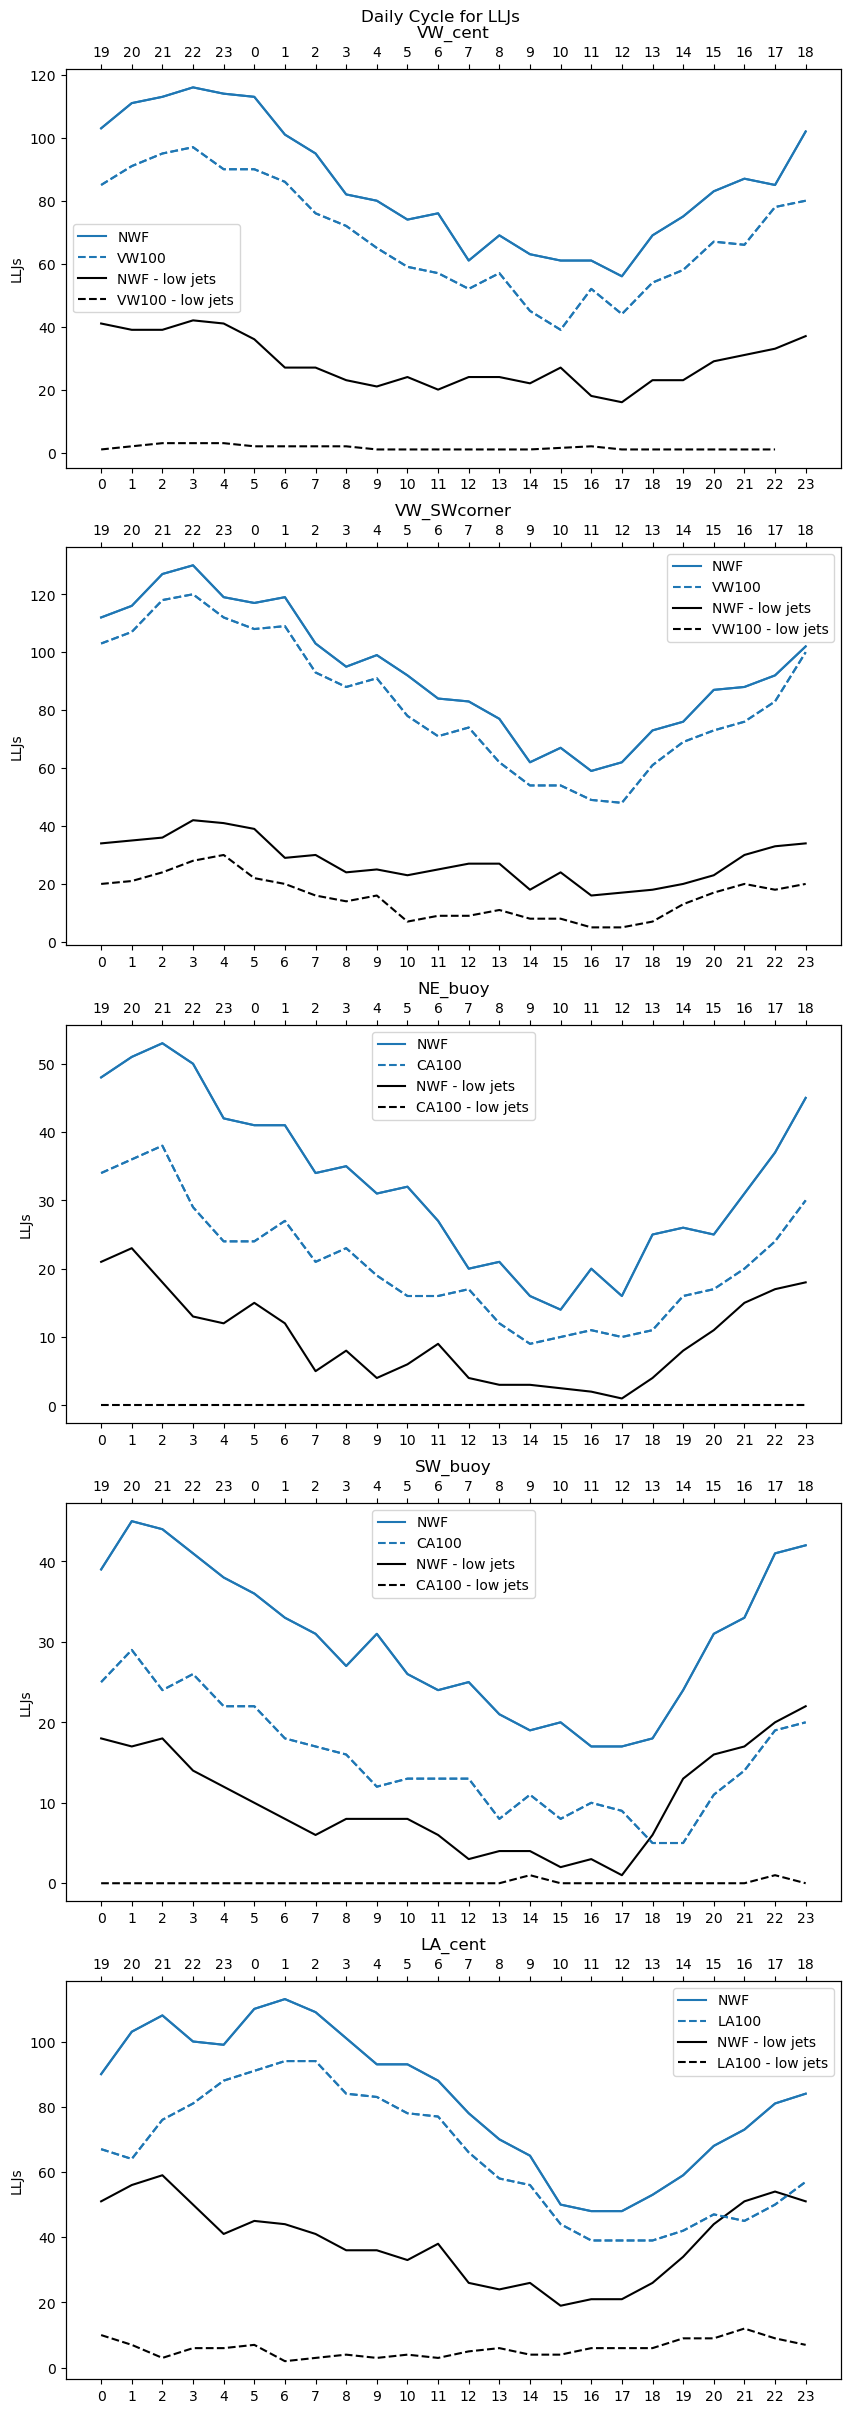

In [9]:
# NOT USING THIS VERSION

# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))

# fig.suptitle('Daily Cycle for LLJs', y=0.9, fontsize=12)

# for i in range(5):
#     plot_daily(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], axs[i])

# fig.savefig('../detection2/panels/daily_panel.png', bbox_inches='tight')

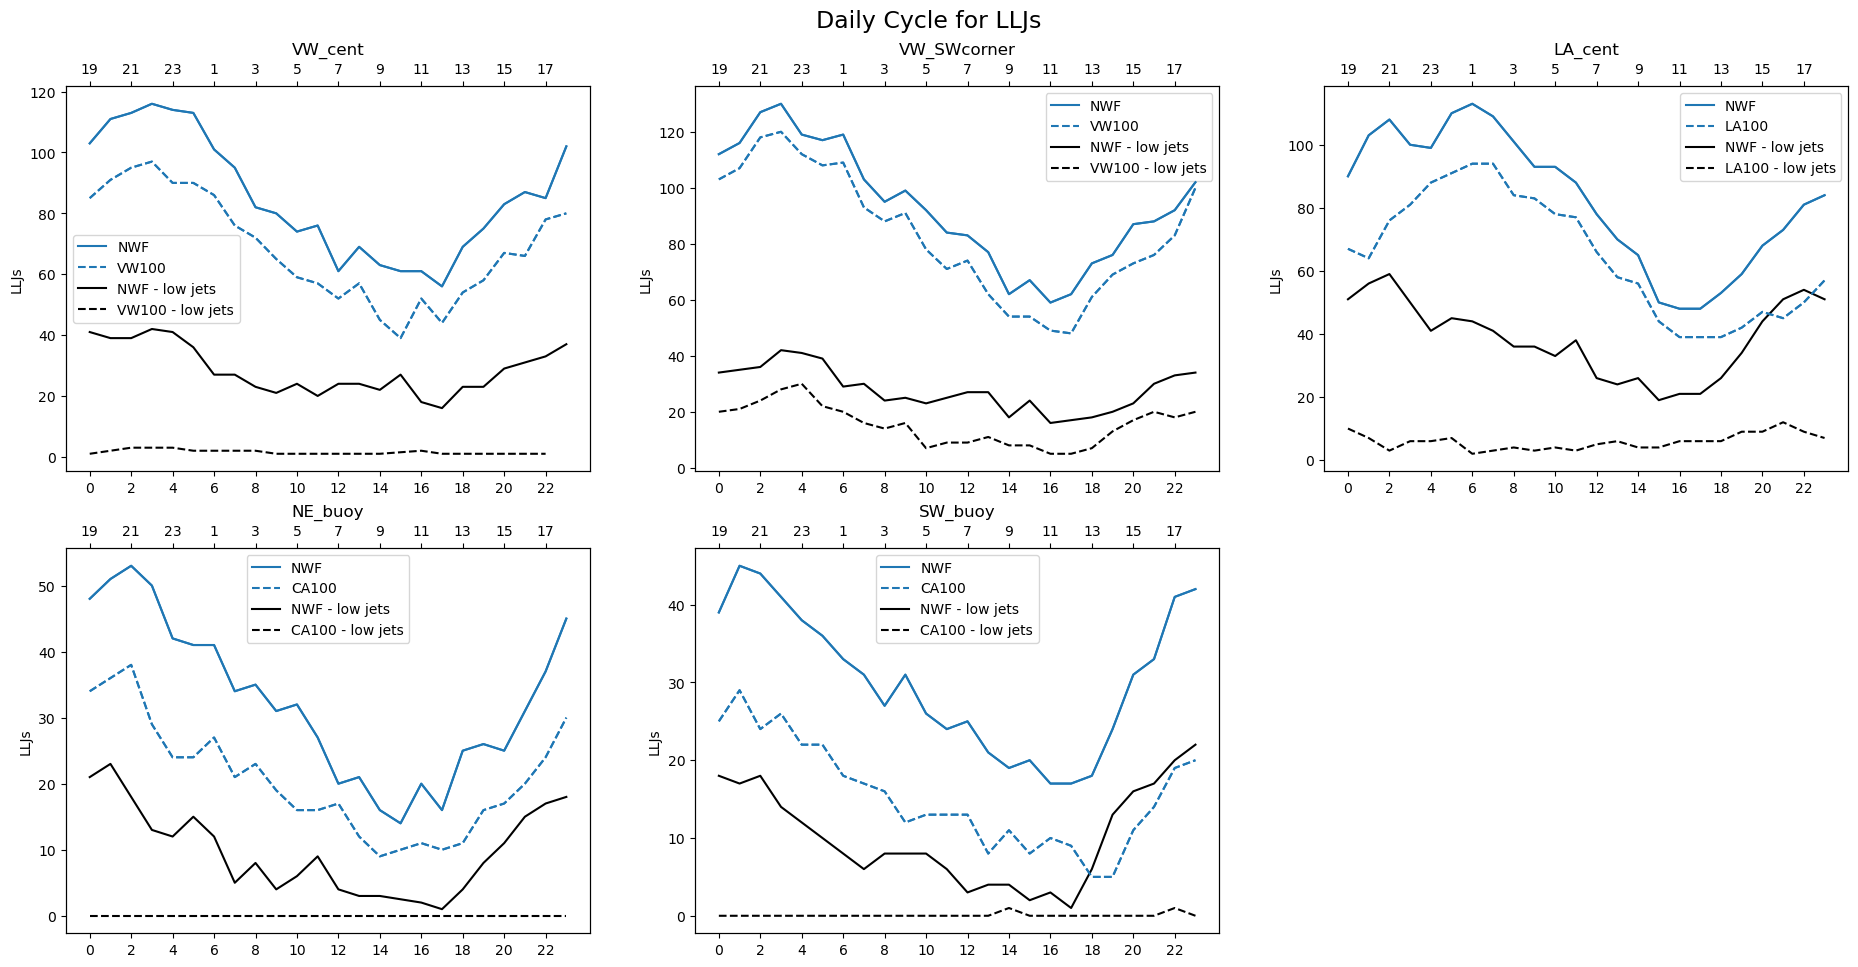

In [26]:
# NOT USING

# fig = plt.figure(figsize=(23,11))
# columns = 3
# rows = 2
# fig.suptitle('Daily Cycle for LLJs', y=0.95, fontsize=17)
# for i in range(1, 6):
#     ax = fig.add_subplot(rows, columns, i)
#     plot_daily(nwf_locs[i-1], wf_locs[i-1], loc_names[i-1], wf_names[i-1], ax)
    
# fig.savefig('../output_plots/paper_plots/daily_panel.png', bbox_inches='tight')

end old versions of daily plot

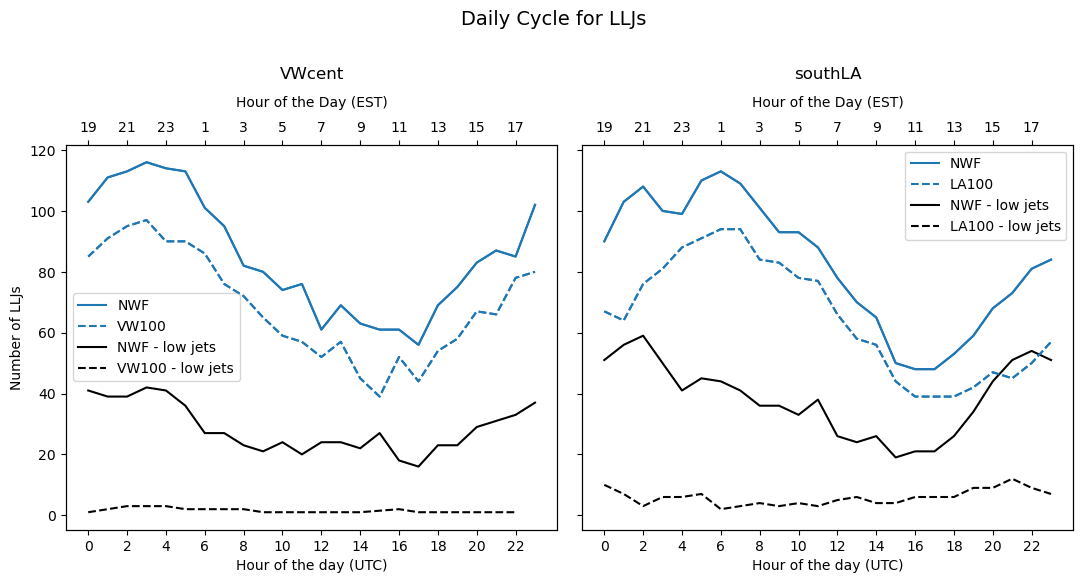

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), sharey=True)

fig.suptitle('Daily Cycle for LLJs', y=1.15, fontsize=14)
for i in range(2):
    ax = axs[i]
    plot_daily(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], ax)
    
plt.subplots_adjust(wspace=0.05)
axs[0].set_ylabel('Number of LLJs')

fig.savefig('../output_plots/paper_plots/daily_panel2.png', bbox_inches='tight')

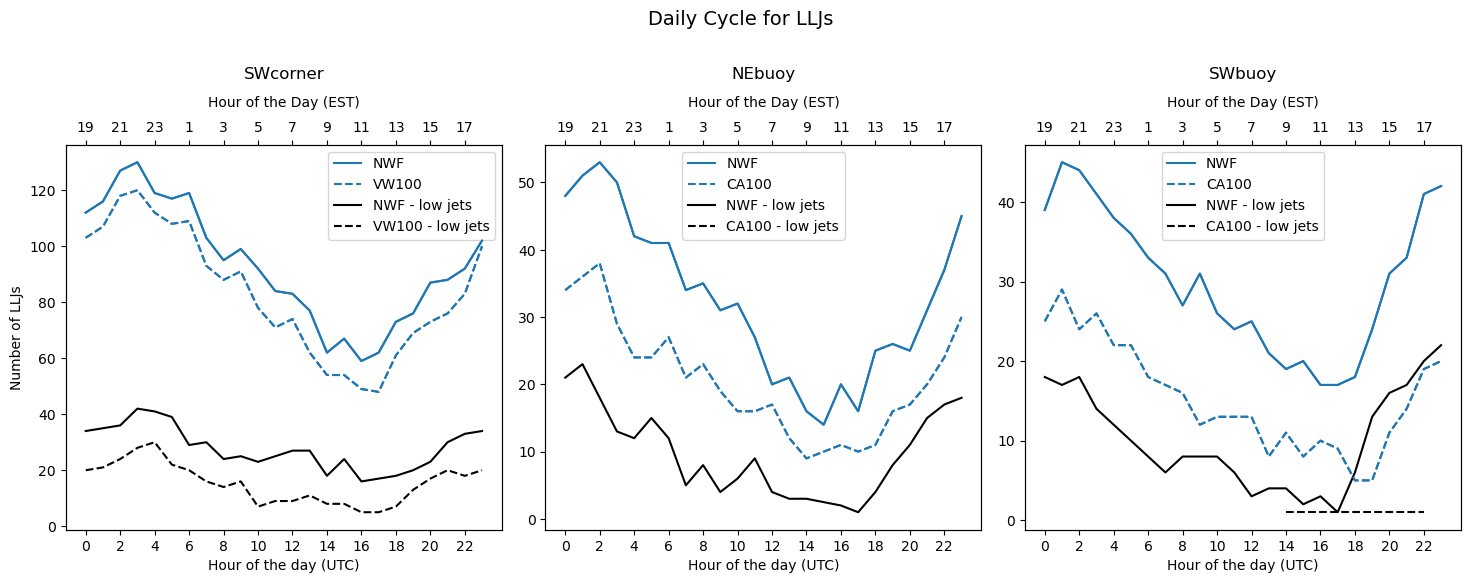

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

fig.suptitle('Daily Cycle for LLJs', y=1.15, fontsize=14)
for i in range(3):
    ax = axs[i]
    plot_daily(nwf_locs[i+2], wf_locs[i+2], loc_names[i+2], wf_names[i+2], ax)
    
plt.subplots_adjust(wspace=0.1)
axs[0].set_ylabel('Number of LLJs')

fig.savefig('../output_plots/paper_plots/daily_panel3.png', bbox_inches='tight')

### Nose heights

In [19]:
def plot_nose_heights(nwf, wf, location, wf_name, ax):
    # make df variable for each level of LLJ
    l0_nwf = nwf[nwf['LLJ-classification']==0]
    l1_nwf = nwf[nwf['LLJ-classification']==1]
    l2_nwf = nwf[nwf['LLJ-classification']==2]
    l3_nwf = nwf[nwf['LLJ-classification']==3]

    l0_wf = wf[wf['LLJ-classification']==0]
    l1_wf = wf[wf['LLJ-classification']==1]
    l2_wf = wf[wf['LLJ-classification']==2]
    l3_wf = wf[wf['LLJ-classification']==3]

    custom_lines = [Line2D([0], [0], color='tab:blue', lw=5),
                    Line2D([0], [0], color='orange', lw=5)]

    bplots = ax.boxplot([l0_nwf['Nose height (meters)'], 
                          l0_wf['Nose height (meters)'],
                          l1_nwf['Nose height (meters)'], 
                          l1_wf['Nose height (meters)'],
                          l2_nwf['Nose height (meters)'], 
                          l2_wf['Nose height (meters)'],
                          l3_nwf['Nose height (meters)'], 
                          l3_wf['Nose height (meters)']],
                          positions=[0.7, 1.3, 2.7, 3.3, 4.7, 5.3, 6.7, 7.3])

    # fill with colors
    colors = ['tab:blue', 'orange']
    # loop through each plot
    for i in range(8):
        box = bplots['boxes'][i]
        box_x = []
        box_y = []
        for j in range(4):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax.add_patch(Polygon(box_coords, facecolor=colors[i%2]))
        
    for median in bplots['medians']:
        median.set_color('black')

    ax.set_xticks(np.arange(1, 9, 2))
    ax.set_xticklabels(np.arange(0, 4))

    ax.set_title(location, fontsize=10)
#     ax.set_ylabel('Nose height (meters)')
    ax.set_xlabel('LLJ classification')
    ax.legend(custom_lines, ['NWF', 'WF'])

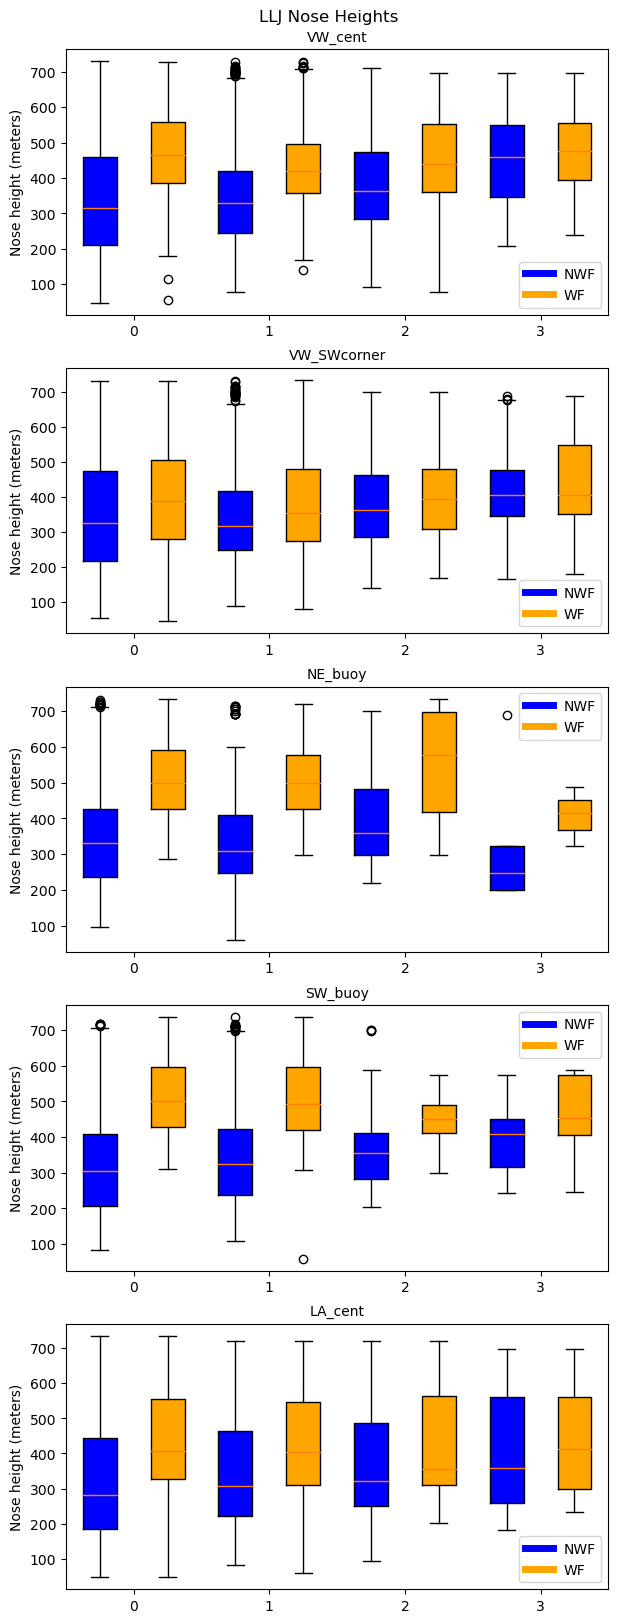

In [11]:
# NOT USING

# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(7, 20))

# fig.suptitle('LLJ Nose Heights', y=0.9, fontsize=12)

# for i in range(5):
#     plot_nose_heights(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], axs[i])

# # fig.savefig('../detection2/panels/nh_panel.png', bbox_inches='tight')

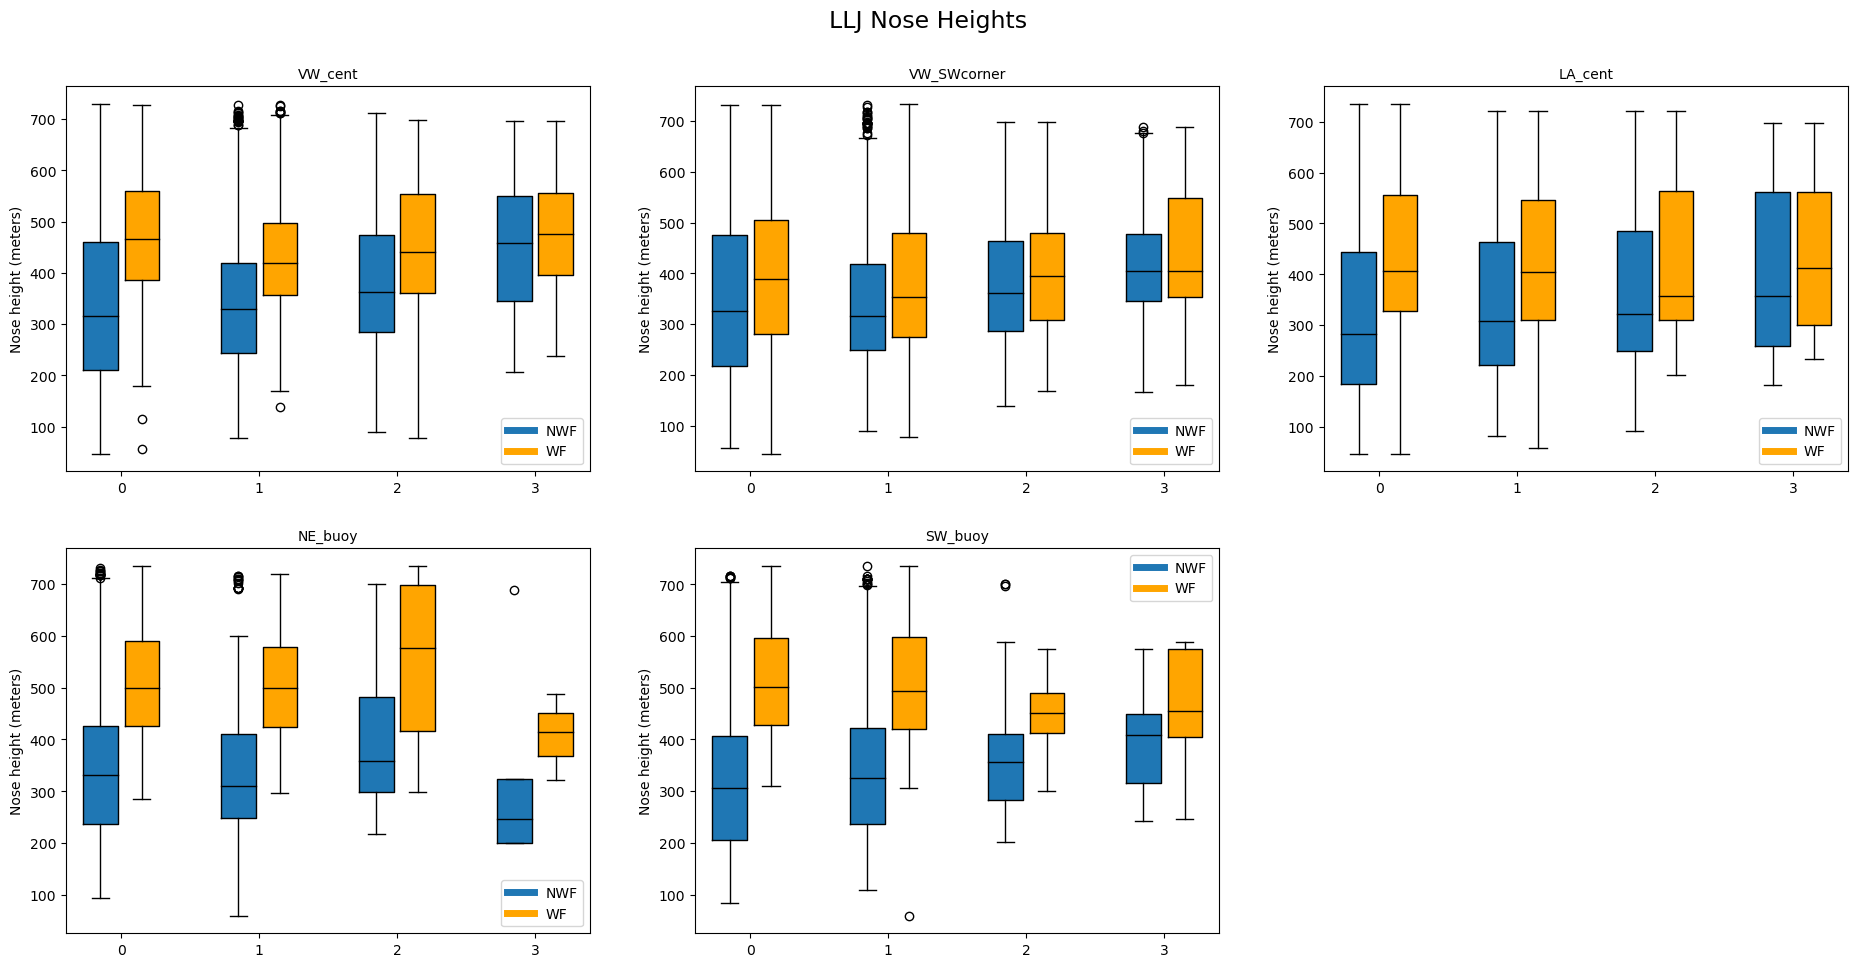

In [29]:
# NOT USING

# fig = plt.figure(figsize=(23,11))
# columns = 3
# rows = 2
# fig.suptitle('LLJ Nose Heights', y=0.95, fontsize=17)
# for i in range(1, 6):
#     ax = fig.add_subplot(rows, columns, i)
#     plot_nose_heights(nwf_locs[i-1], wf_locs[i-1], loc_names[i-1], wf_names[i-1], ax)
    
# fig.savefig('../output_plots/paper_plots/nh_panel.png', bbox_inches='tight')

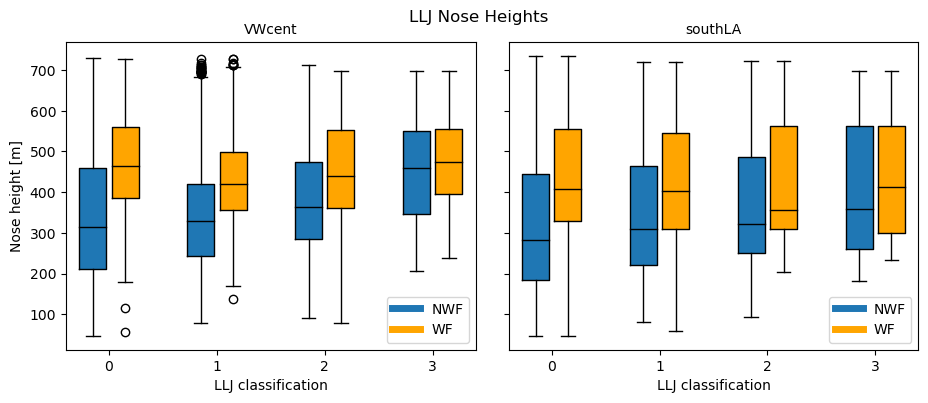

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharey=True)

fig.suptitle('LLJ Nose Heights', y=0.96, fontsize=12)

for i in range(2):
    plot_nose_heights(nwf_locs[i], wf_locs[i], loc_names[i], wf_names[i], axs[i])
    
plt.subplots_adjust(wspace=0.08)
axs[0].set_ylabel('Nose height [m]')

fig.savefig('../output_plots/paper_plots/nh_panel2.png', bbox_inches='tight')

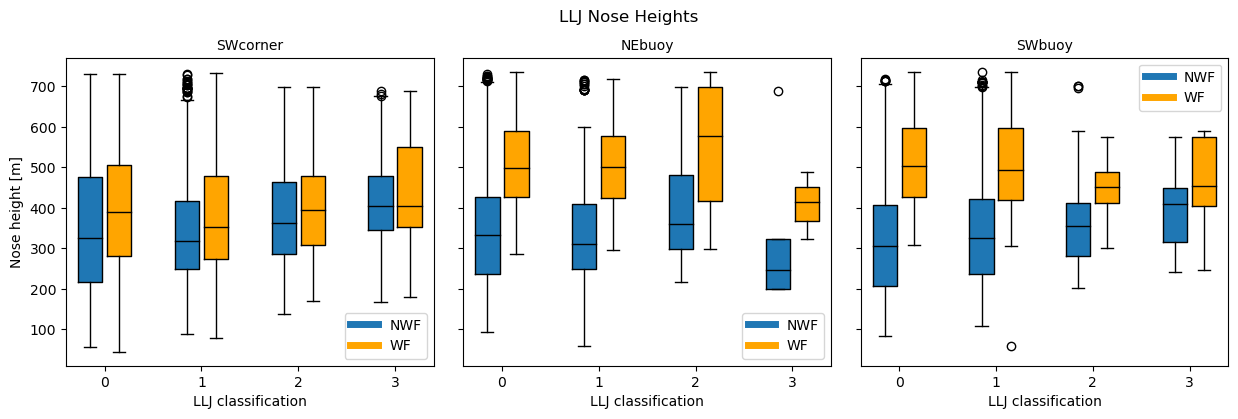

In [66]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)

fig.suptitle('LLJ Nose Heights', y=1, fontsize=12)

for i in range(3):
    plot_nose_heights(nwf_locs[i+2], wf_locs[i+2], loc_names[i+2], wf_names[i+2], axs[i])
    
plt.subplots_adjust(wspace=0.08)
axs[0].set_ylabel('Nose height [m]')

fig.savefig('../output_plots/paper_plots/nh_panel3.png', bbox_inches='tight')